# A group project

## Setup

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Select a PATH pointing to your working directory - where your datasets are saved

In [2]:
PATH =  r'C:\Users\romai\Week 03 Introduction to Machine Learning' ## Your code here ##

Then use the \<os> module to change your current (default) working directory to PATH, your new working directory

In [3]:
## Your code here ##
os.chdir(PATH)

**Import the \<California_Houses.csv> dataset from your working directory**

In [4]:
df_original = pd.read_csv("California_Houses.csv") ## Your code here ##

In [5]:
## Your code here ##
display(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

None

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [6]:
## Your code here ##
display(pd.concat([df_original.head(),df_original.tail()],axis=0))

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
0                  21250.213767  
1                  20880.600400  
2                  18811.487450  
3                  18031.047568  
4                  18031.047568  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575

In [7]:
df_original.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

*Hint : you may wish to associate the name of each city to the smallest distance among the four cities*

Save the transformed dataset as "housing"

In [8]:
df = df_original.copy()

In [9]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [11]:
#######################################
#
# Your lines (and cells) of code here
#
#######################################

cities=['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']

df["Closest_city"]=np.nan

for ind, row in df.iterrows():
    temp=row['Distance_to_LA']
    df.loc[ind,"Closest_city"]='Distance_to_LA'.replace("Distance_to_","")
    for i in cities:
        if temp>row[i]:
            temp=row[i]
            df.loc[ind,"Closest_city"]=i.replace("Distance_to_","")
display(df.head())
df["Closest_city"].value_counts()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  Closest_city  
0              21250.213767  SanFrancisco  
1              20880.600400  SanFrancisco  
2              18811.487450  SanFrancisco  
3              18031.047568  SanFrancisco  
4              18031.047568  SanFrancisco

LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: Closest_city, dtype: int64

In [12]:
housing=df.copy()
housing

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  Closest_city  
0                  21250.213767  SanFrancisco  
1                  20880.600400  SanFrancisco  
2                  18811.487450  SanFrancisco  
3                  18031.047568  SanFrancisco  
4                  18031.047568  SanFrancisco  
...                         ...           ...  
20635             222619.890417  SanFrancisco  
20636             218314.424634  SanFrancisco  
20637             212097.936232  SanFrancisco  
20638             207923.199166  SanFrancisco  
20639             205473.376575  SanFrancisco  

[20640 rows x 15 columns]

**Display the summary of your new dataframe**

In [13]:
## Your code here ##
housing.describe(include="all")

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count         20640.000000   20640.000000  20640.000000  20640.000000   
unique                 NaN            NaN           NaN           NaN   
top                    NaN            NaN           NaN           NaN   
freq                   NaN            NaN           NaN           NaN   
mean         206855.816909       3.870671     28.639486   2635.763081   
std          115395.615874       1.899822     12.585558   2181.615252   
min           14999.000000       0.499900      1.000000      2.000000   
25%          119600.000000       2.563400     18.000000   1447.750000   
50%          179700.000000       3.534800     29.000000   2127.000000   
75%          264725.000000       4.743250     37.000000   3148.000000   
max          500001.000000      15.000100     52.000000  39320.000000   

        Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count   20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      537.898014   1425.476744    499.539680     35.631861   -119.569704   
std       421.247906   1132.462122    382.329753      2.135952      2.003532   
min         1.000000      3.000000      1.000000     32.540000   -124.350000   
25%       295.000000    787.000000    280.000000     33.930000   -121.800000   
50%       435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%       647.000000   1725.000000    605.000000     37.710000   -118.010000   
max      6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

        Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count        20640.000000    2.064000e+04          2.064000e+04   
unique                NaN             NaN                   NaN   
top                   NaN             NaN                   NaN   
freq                  NaN             NaN                   NaN   
mean         40509.264883    2.694220e+05          3.981649e+05   
std          49140.039160    2.477324e+05          2.894006e+05   
min            120.676447    4.205891e+02          4.849180e+02   
25%           9079.756762    3.211125e+04          1.594264e+05   
50%          20522.019101    1.736675e+05          2.147398e+05   
75%          49830.414479    5.271562e+05          7.057954e+05   
max         333804.686371    1.018260e+06          1.196919e+06   

        Distance_to_SanJose  Distance_to_SanFrancisco Closest_city  
count          20640.000000              20640.000000        20640  
unique                  NaN                       NaN            4  
top                     NaN                       NaN           LA  
freq                    NaN                       NaN         9823  
mean          349187.551219             386688.422291          NaN  
std           217149.875026             250122.192316          NaN  
min              569.448118                456.141313          NaN  
25%           113119.928682             117395.477505          NaN  
50%           459758.877000             526546.661701          NaN  
75%           516946.490963             584552.007907          NaN  
max           836762.678210             903627.663298          NaN

In [14]:
housing["Closest_city"]=housing["Closest_city"].astype("category")

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        20640 non-null  float64 
 1   Median_Income             20640 non-null  float64 
 2   Median_Age                20640 non-null  int64   
 3   Tot_Rooms                 20640 non-null  int64   
 4   Tot_Bedrooms              20640 non-null  int64   
 5   Population                20640 non-null  int64   
 6   Households                20640 non-null  int64   
 7   Latitude                  20640 non-null  float64 
 8   Longitude                 20640 non-null  float64 
 9   Distance_to_coast         20640 non-null  float64 
 10  Distance_to_LA            20640 non-null  float64 
 11  Distance_to_SanDiego      20640 non-null  float64 
 12  Distance_to_SanJose       20640 non-null  float64 
 13  Distance_to_SanFrancisco  20640 non-null  floa

# Part 1 - Data explorations

### What do you notice? 

- which attributes are quantitative ?
- which attributes are not quantitative? and what are their types?

In [16]:
housing.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Closest_city'],
      dtype='object')

### *``Your answers here``*

In [17]:
"""
Quantitative attributes: ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']

Attributes which are not quantitative: ['Closest_city'] : categorical attributes
"""



cat_cols=['Closest_city']

### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [18]:
## Your code here ##
housing['Closest_city'].value_counts()

LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: Closest_city, dtype: int64

In [19]:
housing['Closest_city'].value_counts().values[1]

5054

### Show a summary of the quantitative attributes
**Use tables and plots**

In [20]:
## Your code for the tables here ##
quant_cols=['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']

In [21]:
housing[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']].describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

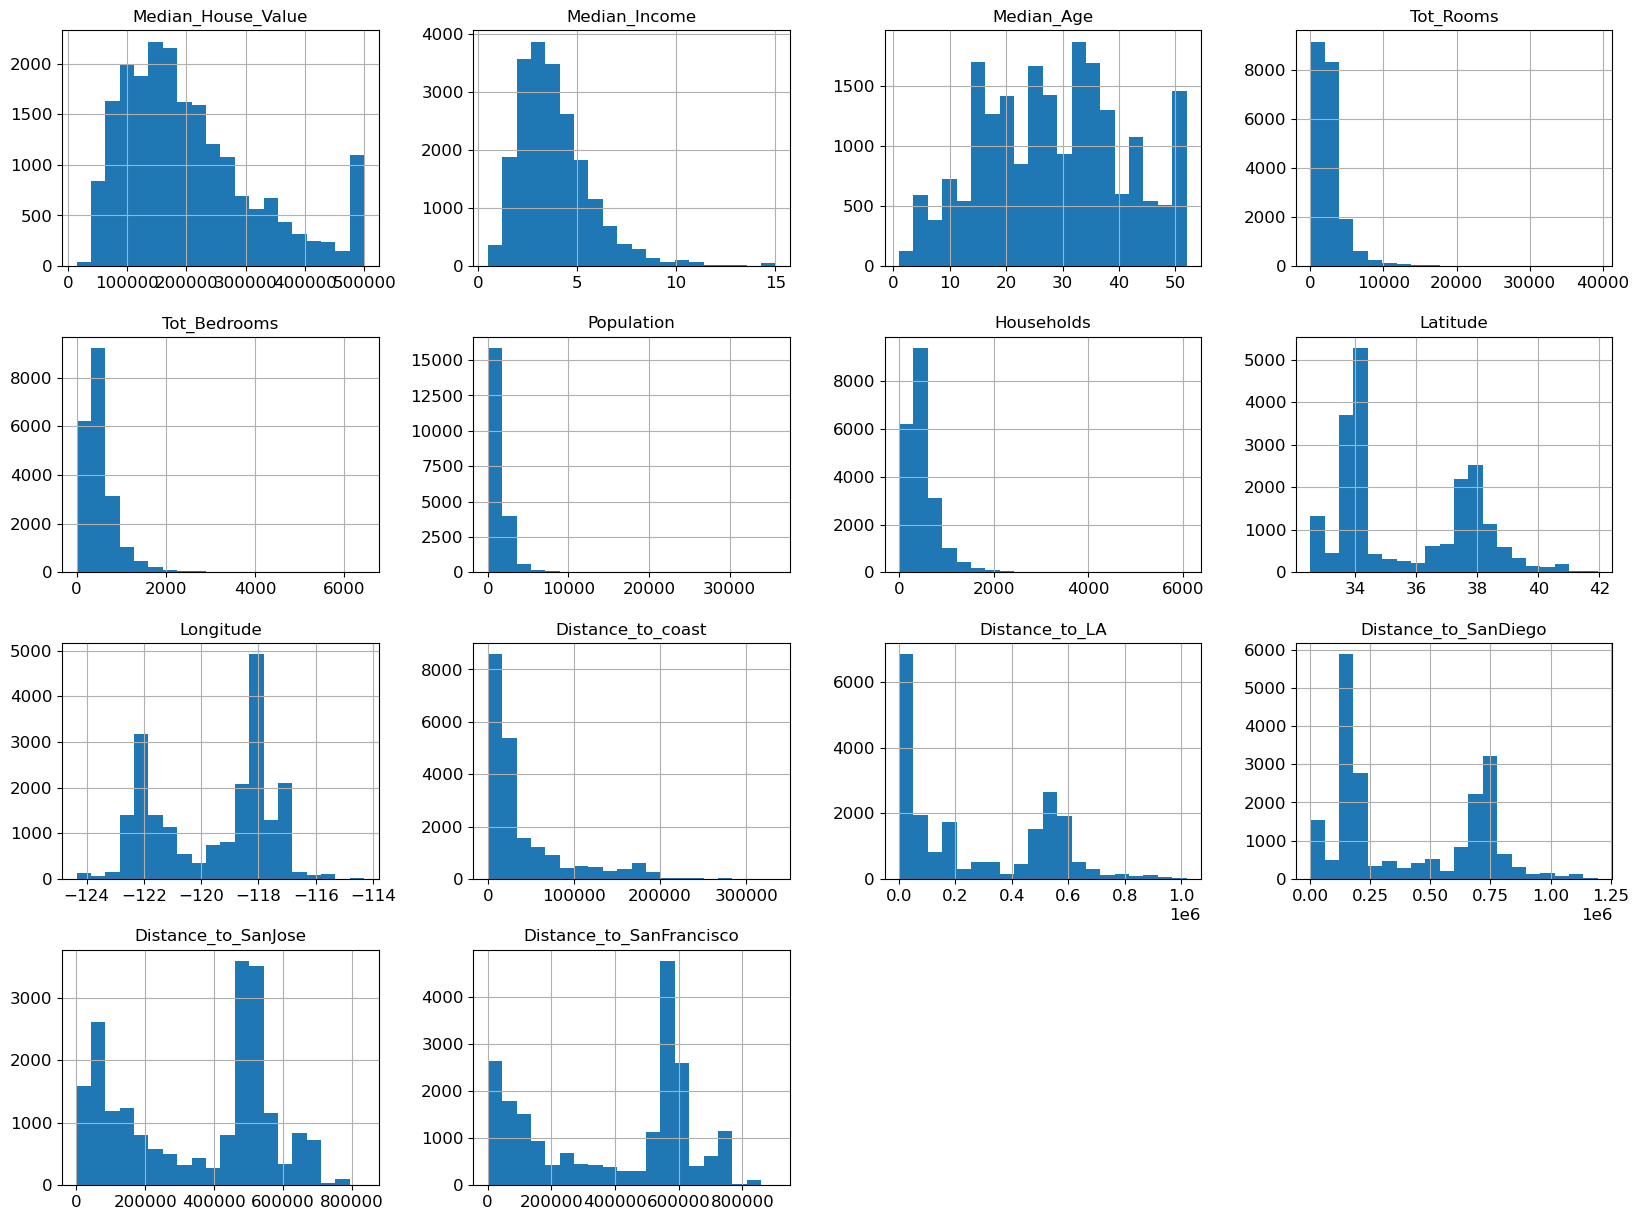

In [23]:
## Your code for the plots here ##
housing.hist(bins=20, figsize=(20, 15))
plt.show()

#### Look more carefully into the distribution of the "median_income" column
Hint : you may wish to change the \<bins> parameter

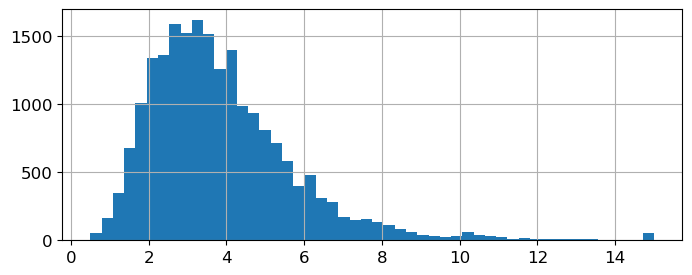

In [24]:
## Your code here ##
housing['Median_Income'].hist(bins=50, figsize=(8,3))
plt.show()

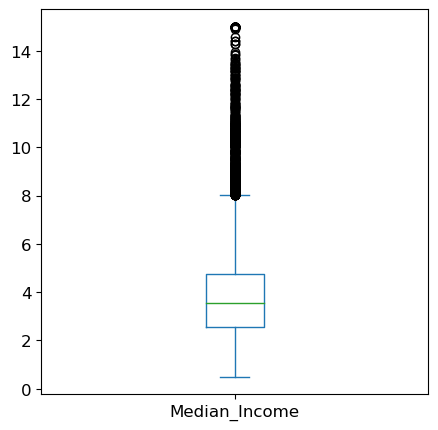

In [25]:
## Your code for a boxplot here ##
housing['Median_Income'].plot(kind="box",figsize=(5,5))
plt.show()

### Explain the following lines of code

### *``Your answers here``*

In [26]:
"""
Now we create a list with the minimum median income,
the 5-quantiles (i don't know how this is called), and the maximum median income.


We use the cat list as delimiter for bins. So we have 5 bins with will contains the value between: 
Bin 1: [0.4999, 2.3523]
Bin 2: [2.3523, 3.1406]
Bin 3: [3.1406, 3.9669399999999997]
Bin 4: [3.9669399999999997, 5.10972]
Bin 5: [5.10972, 15.0001]

We create a new categorical column "income_cat" where each line equals a category based on in which bin its values is.


We count the number of values each attributes of the column "income_cat" has.
As we use the 5-quantiles to build the bins, the count of each attributes is quite similar.


We create an histogram with this column "income_cat".
 
We check the info of the dataframe housing to check our new column.
"""

'\nNow we create a list with the minimum median income,\nthe 5-quantiles (i don\'t know how this is called), and the maximum median income.\n\n\nWe use the cat list as delimiter for bins. So we have 5 bins with will contains the value between: \nBin 1: [0.4999, 2.3523]\nBin 2: [2.3523, 3.1406]\nBin 3: [3.1406, 3.9669399999999997]\nBin 4: [3.9669399999999997, 5.10972]\nBin 5: [5.10972, 15.0001]\n\nWe create a new categorical column "income_cat" where each line equals a category based on in which bin its values is.\n\n\nWe count the number of values each attributes of the column "income_cat" has.\nAs we use the 5-quantiles to build the bins, the count of each attributes is quite similar.\n\n\nWe create an histogram with this column "income_cat".\n \nWe check the info of the dataframe housing to check our new column.\n'

In [27]:
"""
Now we create a list with the minimum median income,
the 5-quantiles (i don't know how this is called), and the maximum median income
"""
cat=[np.min(housing["Median_Income"])]
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(housing["Median_Income"].quantile(i))
cat.append(np.max(housing["Median_Income"]))
print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


In [28]:
for i in range(len(cat)-1):
    print([cat[i],cat[i+1]])

[0.4999, 2.3523]
[2.3523, 3.1406]
[3.1406, 3.9669399999999997]
[3.9669399999999997, 5.10972]
[5.10972, 15.0001]


In [29]:
"""
We use the cat list as delimiter for bins. So we have 5 bins with will contains the value between: 
Bin 1: [0.4999, 2.3523]
Bin 2: [2.3523, 3.1406]
Bin 3: [3.1406, 3.9669399999999997]
Bin 4: [3.9669399999999997, 5.10972]
Bin 5: [5.10972, 15.0001]

We create a new categorical column "income_cat" where each line equals a category based on in which bin its values is.
"""
housing["income_cat"]=pd.cut(housing["Median_Income"], bins=cat, labels = [1,2,3,4,5], include_lowest=True)

In [30]:
#we count the number of values each attributes of the column "income_cat" has
#as we have used the 5-quantiles to build the bins, the count of each attributes is quite similar

housing["income_cat"].value_counts()

2    4131
1    4130
4    4128
5    4128
3    4123
Name: income_cat, dtype: int64

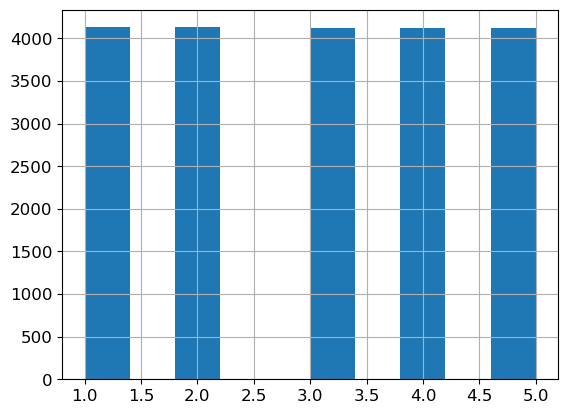

In [31]:
# we create an histogram with this column "income_cat"

housing["income_cat"].hist();

In [32]:
# we check the info of the dataframe housing to check our new column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        20640 non-null  float64 
 1   Median_Income             20640 non-null  float64 
 2   Median_Age                20640 non-null  int64   
 3   Tot_Rooms                 20640 non-null  int64   
 4   Tot_Bedrooms              20640 non-null  int64   
 5   Population                20640 non-null  int64   
 6   Households                20640 non-null  int64   
 7   Latitude                  20640 non-null  float64 
 8   Longitude                 20640 non-null  float64 
 9   Distance_to_coast         20640 non-null  float64 
 10  Distance_to_LA            20640 non-null  float64 
 11  Distance_to_SanDiego      20640 non-null  float64 
 12  Distance_to_SanJose       20640 non-null  float64 
 13  Distance_to_SanFrancisco  20640 non-null  floa

### Create a Test Set through stratified random sampling on the income variable

**Why a test set ?** <br>
**Why stratify the data on the income variable before generating a test set ?** <br>
Hint : use a seed = 42 for the reproductibility of the (re)samplings

### *``Your answers here``*

In [33]:
"""
Why a test set ?
We use a test set in order to avoid overtraining

Why stratify the data on the income variable before generating a test set ?
We stratify the data on the income variable in order to have the same proportion in our test data and on our trained data 
"""

'\nWhy a test set ?\nWe use a test set in order to avoid overtraining\n\nWhy stratify the data on the income variable before generating a test set ?\nWe stratify the data on the income variable in order to have the same proportion in our test data and on our trained data \n'

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
## Your code here ##

# Partition (proportion og test set)
partition = 0.20

# Select a seed for the random splitting
seed = 42

# Split data into training and test
train_strat, test_strat = train_test_split(housing, test_size=partition, random_state=seed, stratify=housing["income_cat"])

print(housing.shape)
print(train_strat.shape)
print(test_strat.shape)

(20640, 16)
(16512, 16)
(4128, 16)


Now generate an equivalent random split without stratification

In [36]:
## Your code here ##
train_random, test_random = train_test_split(housing, test_size=partition, random_state=seed, stratify=None)

print(train_random.shape)
print(test_random.shape)

(16512, 16)
(4128, 16)


#### Explain precisely what each of the two following cells do.

### *``Your answers here``*

In [37]:
"""
1/ function definition
The function income_cat_proportions returns a Pandas serie with the proportion of categories we defined earlier.
The index of this serie are the five income categories.


2/we split randomly (with seed=42) our dataframe "housing" into 2 unstratified dataframes:
"train_set" is 80% of "housing"
"test_set" is 20% of "housing"


3/ we create a dataframe from a dictionnary.
The name of the dataframe is "compare_props" and it has 3 columns ["Overall", "Stratified", "Random"] and 5 rows.
The index of rows of this dataframe are the five income categories.

We use the function income_cat_proportions on various dataframes to fill the dictionnary.

"Overall" column gives values corresponding to the whole "housing" dataframe
"Stratified" column  gives values corresponding to the stratified sample dataframe "test_strat"
"Random" column  gives values corresponding to  for the unstratified sample dataframe "test_random" created earlier

Finally .sort_index() sort compare_props by index otherwise it would have been by propotion descending


4/we had 2 columns to the dataframe "compare_props"
Their names are ["Rand. %error", "Strat. %error"]. For each proportion of each income category (row):
"Rand. %error" gives the percentage of difference between the unstratified sample and the original dataframe "housing"
"Strat. %error"gives the percentage of difference between the stratified sample and the original dataframe "housing"


5/Ine the next cell, compare_props shows the dataframe to check what we have created


Note: the 2 dataframes created in point 2/ haven't been used for now
"""

'\n1/ function definition\nThe function income_cat_proportions returns a Pandas serie with the proportion of categories we defined earlier.\nThe index of this serie are the five income categories.\n\n\n2/we split randomly (with seed=42) our dataframe "housing" into 2 unstratified dataframes:\n"train_set" is 80% of "housing"\n"test_set" is 20% of "housing"\n\n\n3/ we create a dataframe from a dictionnary.\nThe name of the dataframe is "compare_props" and it has 3 columns ["Overall", "Stratified", "Random"] and 5 rows.\nThe index of rows of this dataframe are the five income categories.\n\nWe use the function income_cat_proportions on various dataframes to fill the dictionnary.\n\n"Overall" column gives values corresponding to the whole "housing" dataframe\n"Stratified" column  gives values corresponding to the stratified sample dataframe "test_strat"\n"Random" column  gives values corresponding to  for the unstratified sample dataframe "test_random" created earlier\n\nFinally .sort_inde

In [38]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(test_strat),
    "Random": income_cat_proportions(test_random),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [39]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.200097    0.200097  0.202762      1.331719  -1.421085e-14
2  0.200145    0.200097  0.203973      1.912370  -2.420721e-02
3  0.199758    0.199612  0.205184      2.716469  -7.276255e-02
4  0.200000    0.200097  0.198886     -0.557171   4.844961e-02
5  0.200000    0.200097  0.189196     -5.402132   4.844961e-02

**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [40]:
## Your code here ##
houses_df=train_strat.copy()
houses_df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816          10       7136          1691   
17718            355300.0         7.2707           8       3088           474   
19928             87700.0         3.6895          29       2409           436   
13782            104600.0         1.3993          28       3009           698   
18138            351500.0         5.2108          31       3344           620   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405         2959        1507     37.96    -122.06       10235.180749   
17718        1799         456     37.33    -121.77       31247.007622   
19928        1142         440     36.32    -119.32      173659.998787   
13782        1200         626     34.03    -117.05       87439.318166   
18138        1604         572     37.34    -122.00       16588.263207   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
1405    553643.787458         732888.478075         70982.348385   
17718   483915.911504         662665.139516         10894.463096   
19928   270464.275712         446891.969226        255323.112233   
13782   110013.263123         146503.069766        571187.737490   
18138   498617.985733         676926.890759          9470.548635   

       Distance_to_SanFrancisco  Closest_city income_cat  
1405               38602.906675  SanFrancisco          4  
17718              76391.177725       SanJose          5  
19928             319946.815485       SanJose          3  
13782             638724.634162            LA          1  
18138              61432.768974       SanJose          5

### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

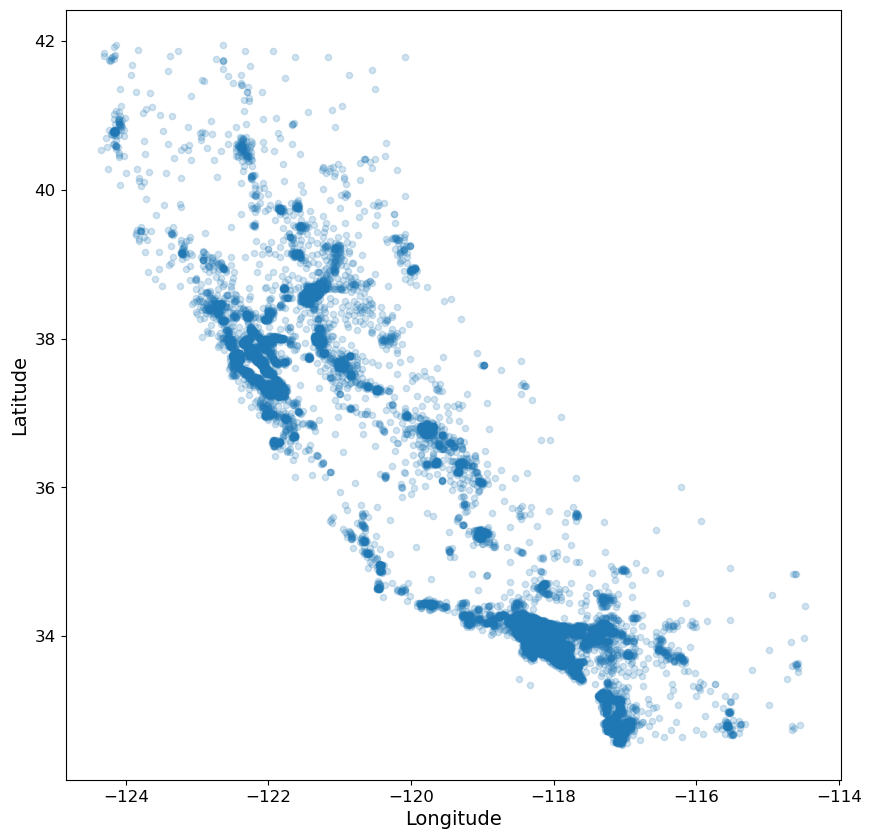

In [41]:
## Your code here ##
houses_df.plot(x="Longitude",y="Latitude",kind="scatter",figsize=(10,10), alpha=0.2)
plt.show()


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816          10       7136          1691   
17718            355300.0         7.2707           8       3088           474   
19928             87700.0         3.6895          29       2409           436   
13782            104600.0         1.3993          28       3009           698   
18138            351500.0         5.2108          31       3344           620   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405         2959        1507     37.96    -122.06       10235.180749   
17718        1799         456     37.33    -121.77       31247.007622   
19928        1142         440     36.32    -119.32      173659.998787   
13782        1200         626     34.03    -117.05       87439.318166   
18138        1604         572     37.34    -122.00       16588.263207   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
1405    553643.787458         732888.478075         70982.348385   
17718   483915.911504         662665.139516         10894.463096   
19928   270464.275712         446891.969226        255323.112233   
13782   110013.263123         146503.069766        571187.737490   
18138   498617.985733         676926.890759          9470.548635   

       Distance_to_SanFrancisco  Closest_city income_cat  \
1405               38602.906675  SanFrancisco          4   
17718              76391.177725       SanJose          5   
19928             319946.815485       SanJose          3   
13782             638724.634162            LA          1   
18138              61432.768974       SanJose          5   

                          geometry  
1405   POINT (-122.06000 37.96000)  
17718  POINT (-121.77000 37.33000)  
19928  POINT (-119.32000 36.32000)  
13782  POINT (-117.05000 34.03000)  
18138  POINT (-122.00000 37.34000)

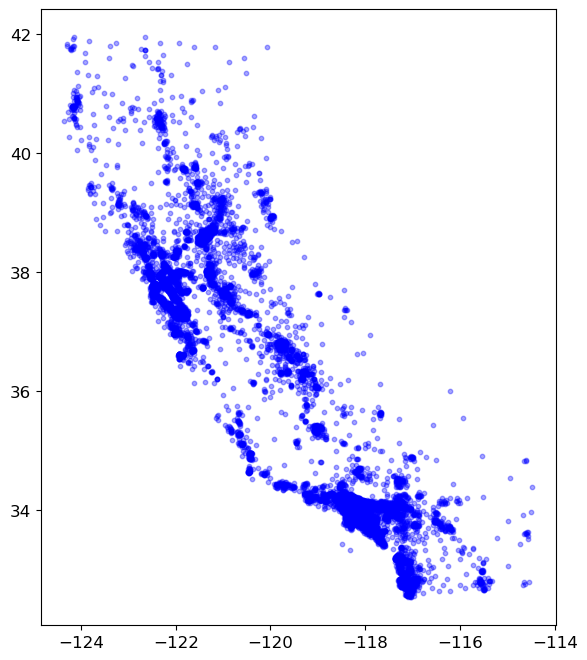

In [42]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(houses_df, geometry=gpd.points_from_xy(houses_df.Longitude, houses_df.Latitude), crs="EPSG:4326")

display(gdf.head())

districts = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.Longitude, gdf.Latitude))

fig, ax = plt.subplots(1, figsize =(16, 8)) 
ax = districts.plot(ax = ax, markersize = 10,alpha=0.35, color = "blue", marker = 'o')

### Geographic map of California houses values per district with population density

**Try to understand and comment on the following code**

### *``Your comments here``*

[ 14999.   63499.2 111999.4 160499.6 208999.8 257500.  306000.2 354500.4
 403000.6 451500.8 500001. ]
['$15k', '$63k', '$112k', '$160k', '$209k', '$258k', '$306k', '$355k', '$403k', '$452k', '$500k']


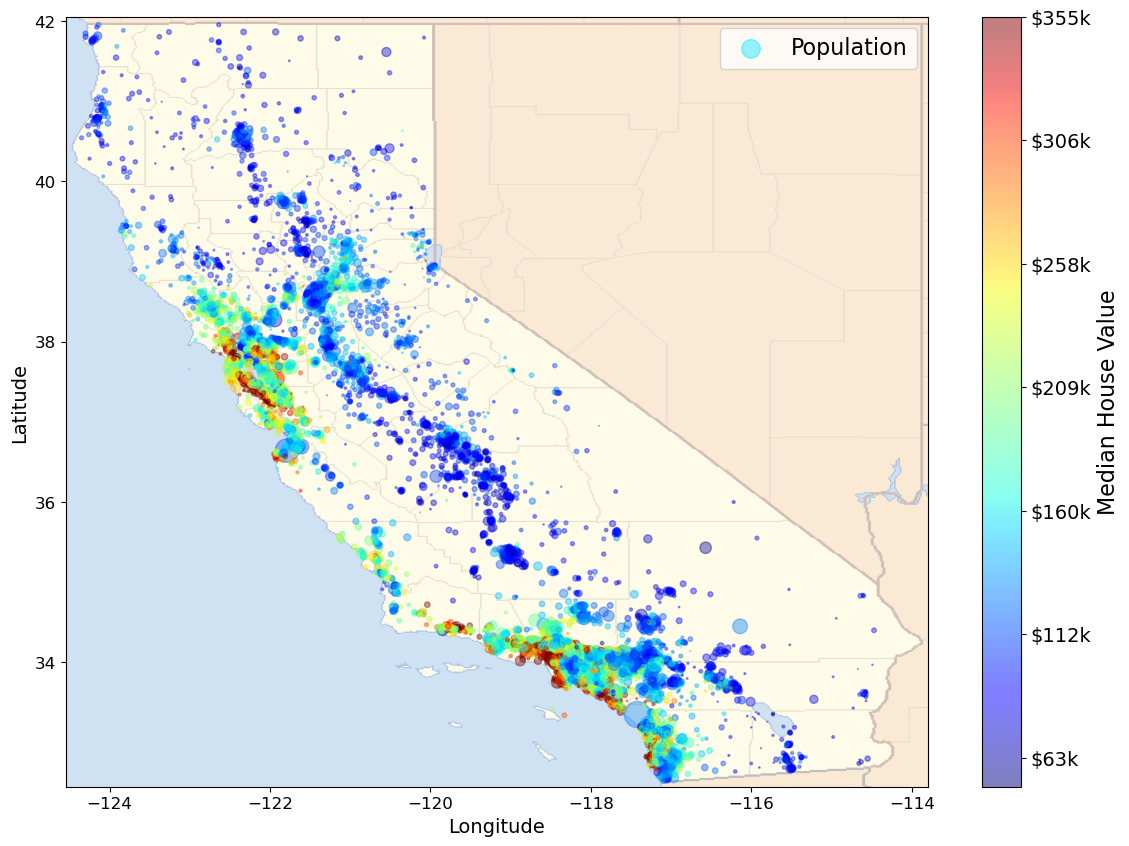

In [43]:
# import the warning library
import warnings
# use the module filterwarnings to ignore all the warnings
warnings.filterwarnings("ignore")

# import the module image from the matplotlib library to read images
import matplotlib.image as mpimg
# load the image "california.png" in a variable called california_img
california_img=mpimg.imread("california.png")
"""
plot a scatter plot using:
houses_df['Longitude'] as x
houses_df['Latitude'] as y
houses_df['Population']/100 = size of the marker
'Population' as label for the markers
Using the Median_House_Value values to set a color from a colormap for each dot
Using the "jet" colormap
Without displaying the colorbar (we will set this features just after with the 3 cbar= lines)
Setting the transparency to 0.4

"""
ax = houses_df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(14,10),
                       s=houses_df['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)
"""
Display the image california_img on the same graph
Make it fit with our scatter plot setting the extent to [-124.55, -113.80, 32.45, 42.05]
Setting the transparency to 0.5
Using the same "jet" colormap
"""
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
# set the y label of the plot
plt.ylabel("Latitude", fontsize=14)
# set the x label of the plot
plt.xlabel("Longitude", fontsize=14)

"""
create an array with linear values from the houses_df["Median_House_Value"] column values
the array has to go from the minimum Median_House_Value to the maximum Median_House_Value
the values in this array will be the ticks for the color bar
"""
prices = houses_df["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
print(tick_values)
print(["$%dk"%(round(v/1000)) for v in tick_values])   # I don't know why we can't see '15k', '$403k', '$452k', '$500k'
#set a color bar showing the color map scale
cbar = plt.colorbar()
#set the labels for the y ticks of this color bar. it has to be in $_k and set their size to 14
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#set the label for this color bar to 'Median House Value' and set his size to 16
cbar.set_label('Median House Value', fontsize=16)

# set the size of label="Population" to 16
plt.legend(fontsize=16)

plt.show()

### Bivariate Analysis

**How are the different variables related to each other two by two ?**

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

In [44]:
## your code here ##
quant_cols=[]
for i in houses_df:
    if houses_df[i].dtype in ["int64","float64"]:
        quant_cols.append(i)
print(quant_cols)

houses_cor=houses_df[quant_cols].corr()

['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']


In [45]:
houses_cor

Median_House_Value  Median_Income  Median_Age  \
Median_House_Value                  1.000000       0.689597    0.105611   
Median_Income                       0.689597       1.000000   -0.120037   
Median_Age                          0.105611      -0.120037    1.000000   
Tot_Rooms                           0.136635       0.202029   -0.359979   
Tot_Bedrooms                        0.052198      -0.007776   -0.318223   
Population                         -0.023350       0.005136   -0.295396   
Households                          0.066550       0.013197   -0.300398   
Latitude                           -0.141518      -0.081302    0.013917   
Longitude                          -0.046849      -0.013227   -0.109430   
Distance_to_coast                  -0.466959      -0.243499   -0.221713   
Distance_to_LA                     -0.128196      -0.065601   -0.029561   
Distance_to_SanDiego               -0.090243      -0.056794    0.038401   
Distance_to_SanJose                -0.041815      -0.033266   -0.094079   
Distance_to_SanFrancisco           -0.031028      -0.019349   -0.105472   

                          Tot_Rooms  Tot_Bedrooms  Population  Households  \
Median_House_Value         0.136635      0.052198   -0.023350    0.066550   
Median_Income              0.202029     -0.007776    0.005136    0.013197   
Median_Age                -0.359979     -0.318223   -0.295396   -0.300398   
Tot_Rooms                  1.000000      0.927990    0.852313    0.916679   
Tot_Bedrooms               0.927990      1.000000    0.875293    0.980579   
Population                 0.852313      0.875293    1.000000    0.904064   
Households                 0.916679      0.980579    0.904064    1.000000   
Latitude                  -0.033090     -0.063797   -0.109085   -0.069316   
Longitude                  0.040912      0.064818    0.099487    0.052827   
Distance_to_coast         -0.001871     -0.023576   -0.041550   -0.063321   
Distance_to_LA            -0.017192     -0.054600   -0.110663   -0.061115   
Distance_to_SanDiego      -0.035863     -0.065010   -0.109849   -0.067231   
Distance_to_SanJose        0.029758      0.057122    0.080355    0.046280   
Distance_to_SanFrancisco   0.030563      0.057823    0.089674    0.048584   

                          Latitude  Longitude  Distance_to_coast  \
Median_House_Value       -0.141518  -0.046849          -0.466959   
Median_Income            -0.081302  -0.013227          -0.243499   
Median_Age                0.013917  -0.109430          -0.221713   
Tot_Rooms                -0.033090   0.040912          -0.001871   
Tot_Bedrooms             -0.063797   0.064818          -0.023576   
Population               -0.109085   0.099487          -0.041550   
Households               -0.069316   0.052827          -0.063321   
Latitude                  1.000000  -0.925593           0.300766   
Longitude                -0.925593   1.000000           0.007656   
Distance_to_coast         0.300766   0.007656           1.000000   
Distance_to_LA            0.941873  -0.892826           0.194428   
Distance_to_SanDiego      0.991551  -0.958927           0.211667   
Distance_to_SanJose      -0.856077   0.924483          -0.077054   
Distance_to_SanFrancisco -0.898282   0.955289          -0.067475   

                          Distance_to_LA  Distance_to_SanDiego  \
Median_House_Value             -0.128196             -0.090243   
Median_Income                  -0.065601             -0.056794   
Median_Age                     -0.029561              0.038401   
Tot_Rooms                      -0.017192             -0.035863   
Tot_Bedrooms                   -0.054600             -0.065010   
Population                     -0.110663             -0.109849   
Households                     -0.061115             -0.067231   
Latitude                        0.941873              0.991551   
Longitude                      -0.892826             -0.958927   
Distance_to_coast               0.194428              0.211667 

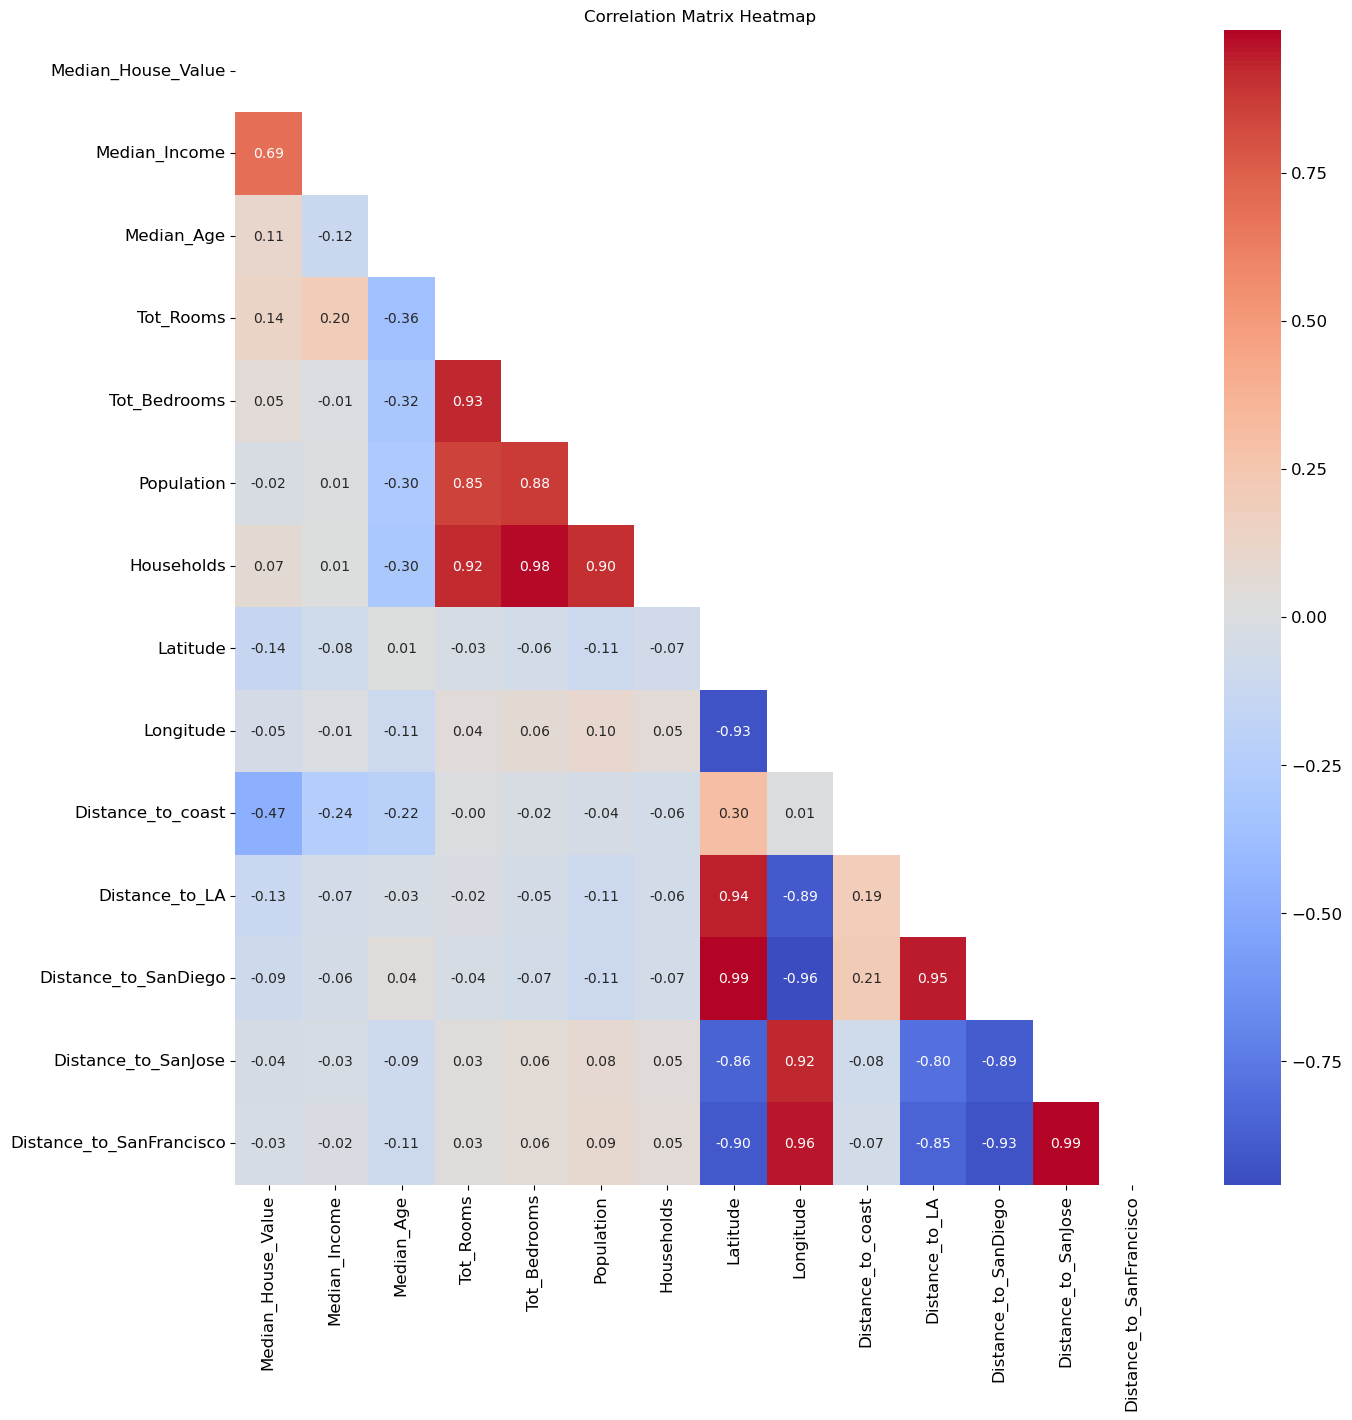

In [46]:
import seaborn as sns

mask=np.triu(houses_cor)

plt.figure(figsize=(15,15))
sns.heatmap(houses_cor, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.show()

Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

In [47]:
## Your code here ##
most_important_correlations=houses_cor.copy()

for i in most_important_correlations.columns:
    if i!="Median_House_Value":
        most_important_correlations.drop(columns=i,inplace=True)
most_important_correlations.drop(index="Median_House_Value",inplace=True)

most_important_correlations["Effect_size_meaning"]=pd.cut(abs(most_important_correlations["Median_House_Value"]), bins=[0,0.1,0.3,0.5,1], labels = ["Very Small (Negligible)","Small","Medium","Large"], include_lowest=True)

mask=abs(most_important_correlations["Median_House_Value"])>0.1
display(most_important_correlations.loc[mask])


Median_House_Value Effect_size_meaning
Median_Income                0.689597               Large
Median_Age                   0.105611               Small
Tot_Rooms                    0.136635               Small
Latitude                    -0.141518               Small
Distance_to_coast           -0.466959              Medium
Distance_to_LA              -0.128196               Small

### *``Your comments here``*

Why is it pertinent to choose this variable as outcome (target) ?

Please refer to the word document.

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

The predictors worthy of interest are those with an |r|>0.1 (= effect size small, medium or large):

- Median_Income
- Median_Age
- Tot_Rooms
- Latitude
- Distance_to_coast
- Distance_to_LA


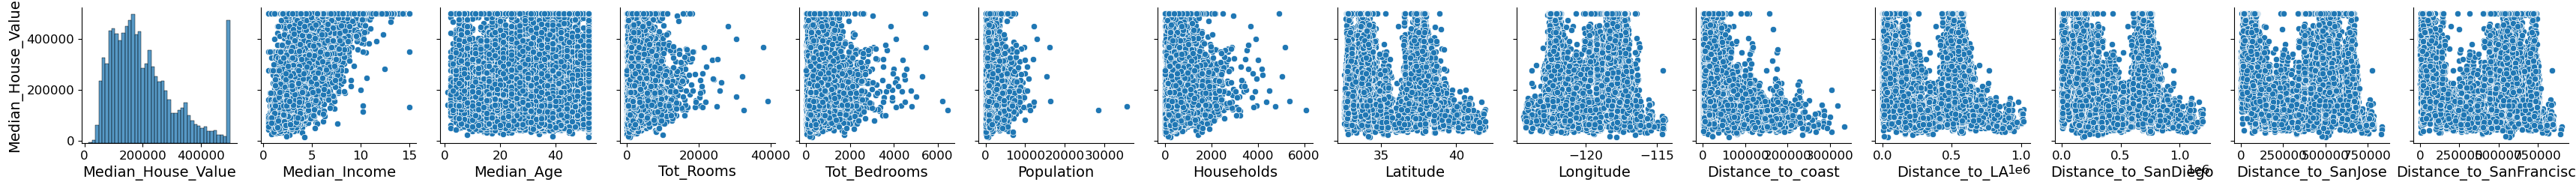

In [50]:
## Your code here ##
sns.pairplot(data=houses_df, y_vars=['Median_House_Value'], x_vars=quant_cols)
plt.show()

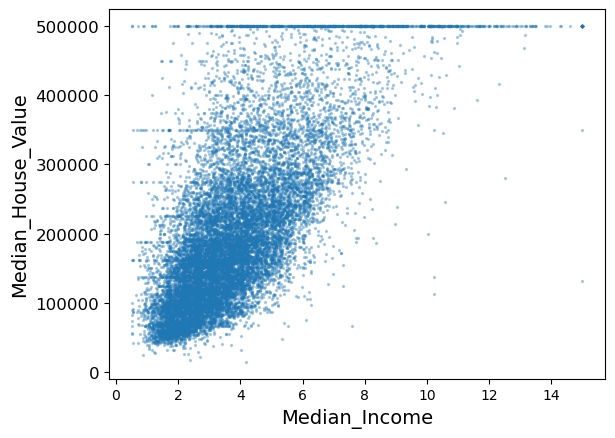

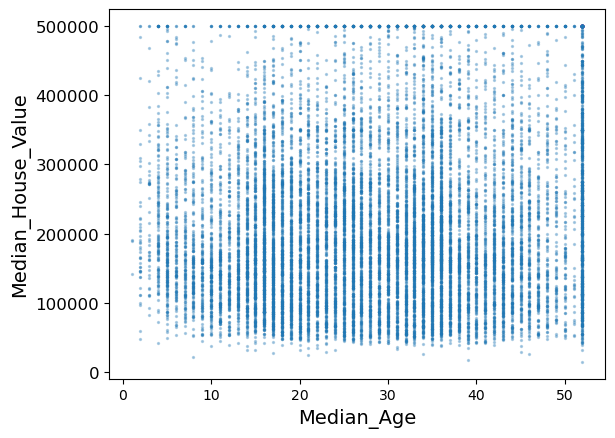

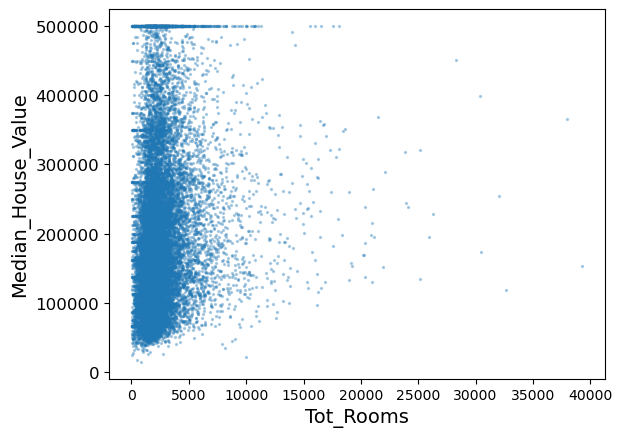

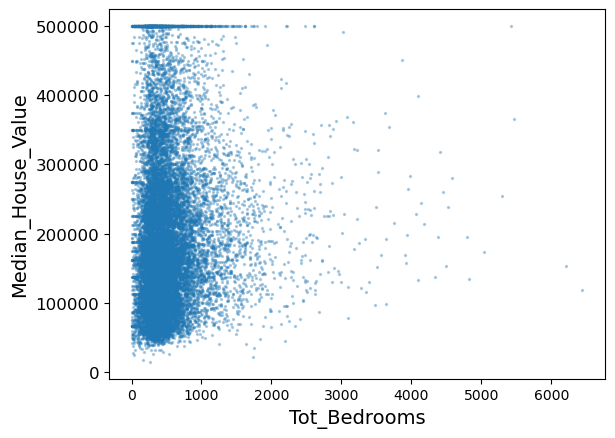

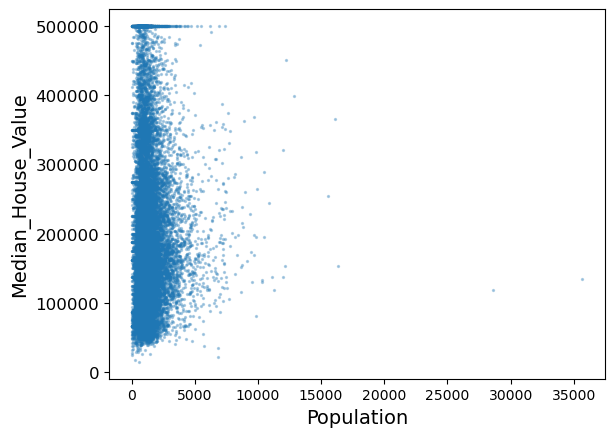

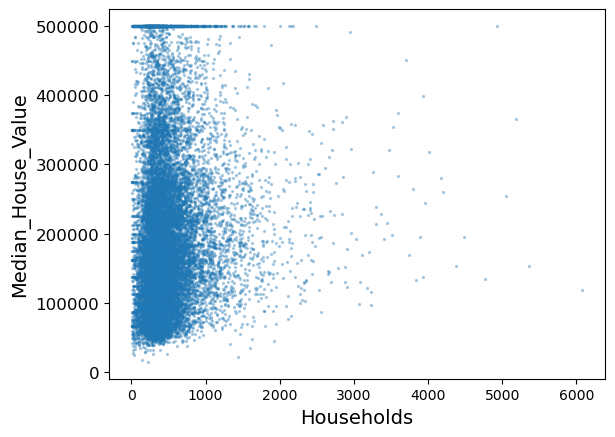

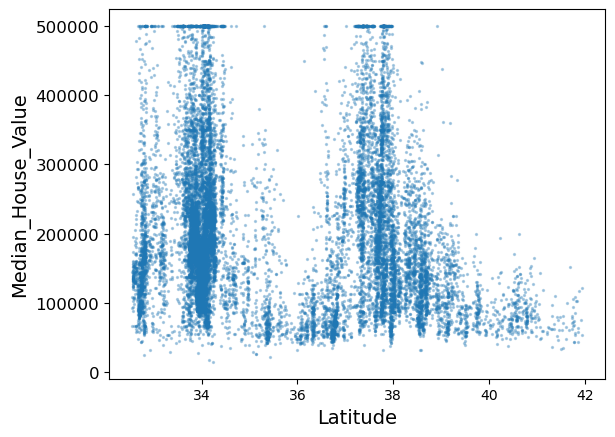

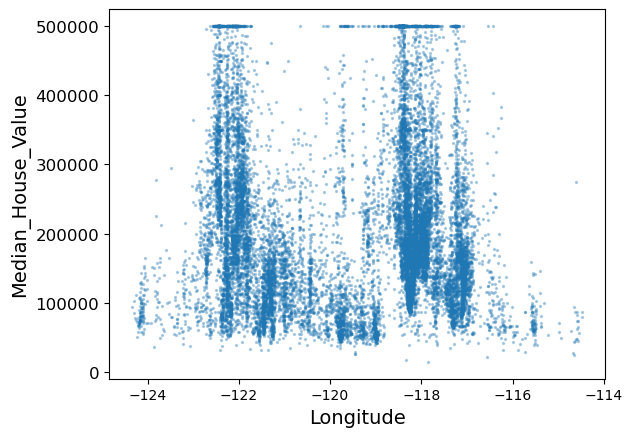

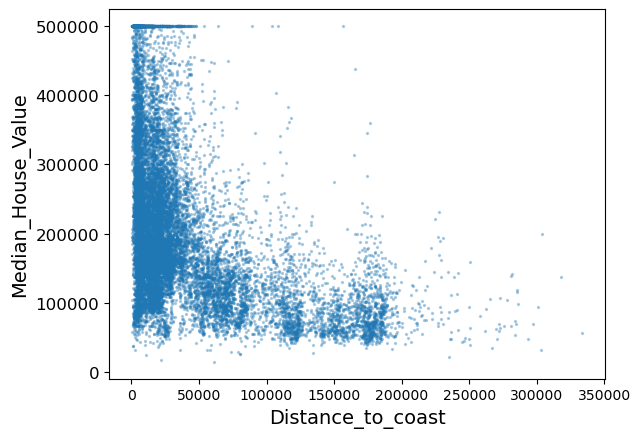

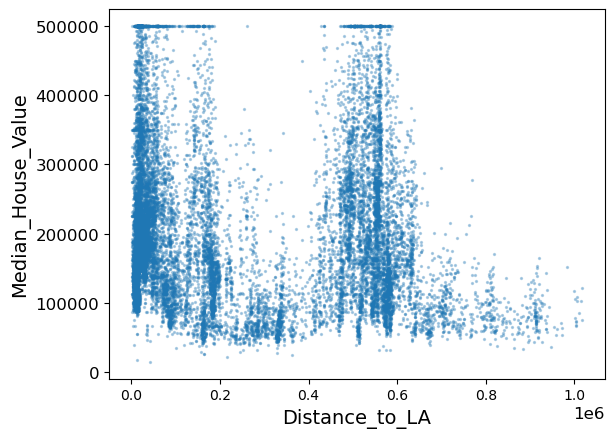

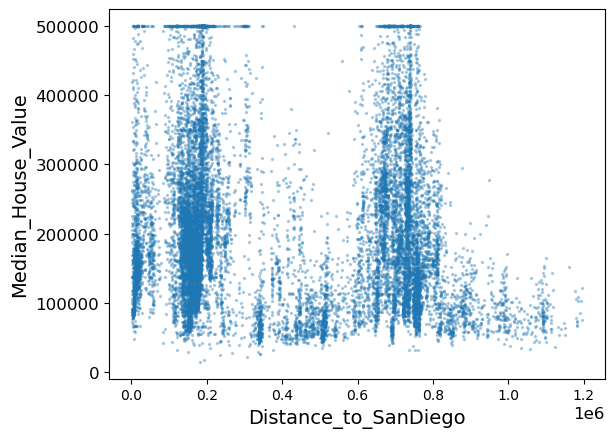

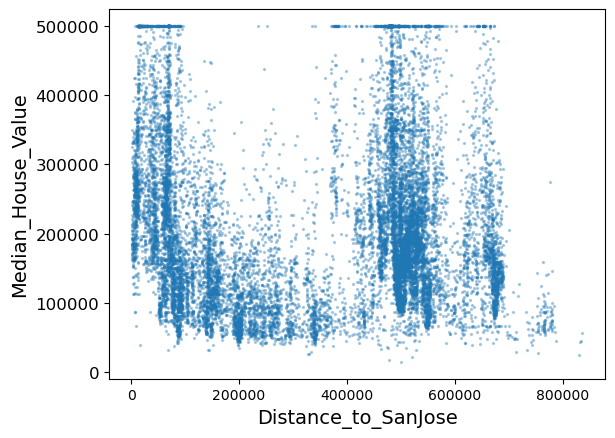

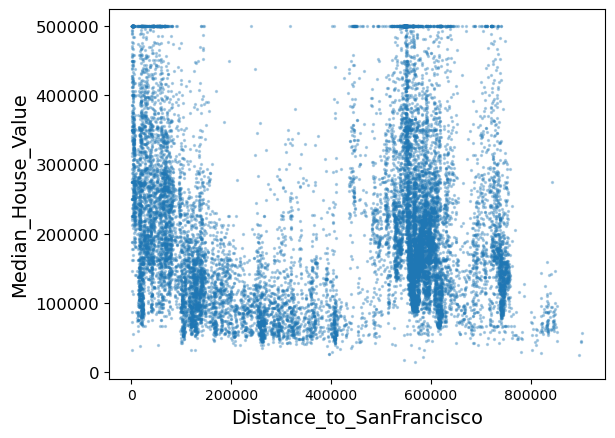

In [51]:
## Your code here ##
for i in quant_cols:
    if i!="Median_House_Value":
        houses_df.plot(kind="scatter",x=i,y="Median_House_Value",s=2, alpha=0.3)
        plt.xticks(fontsize=10)
plt.show()

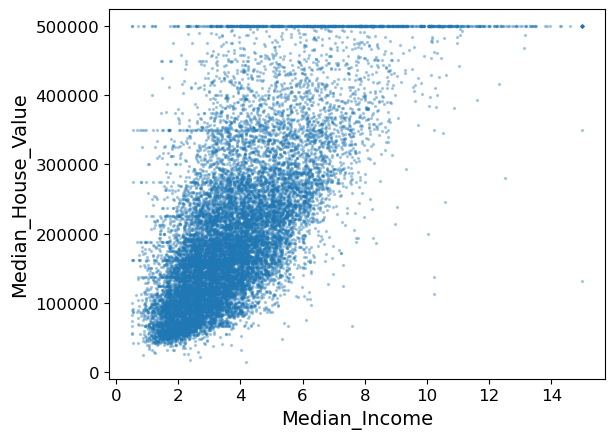

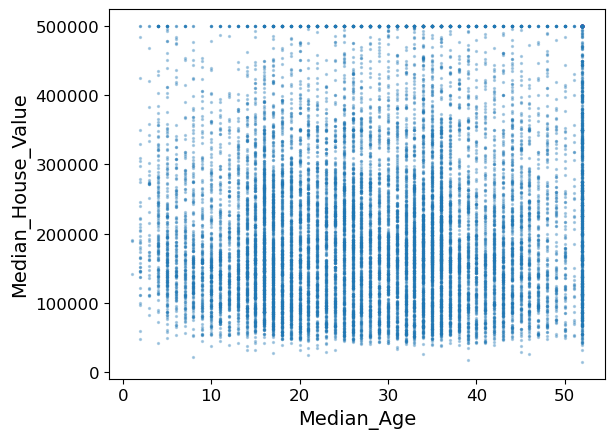

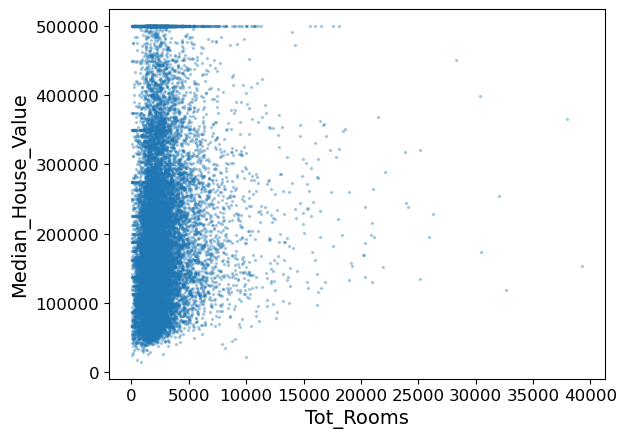

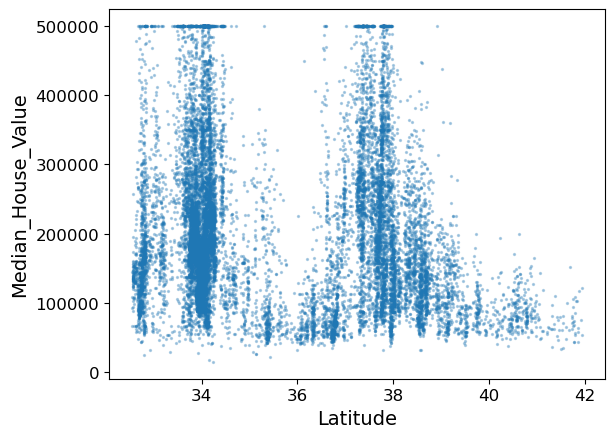

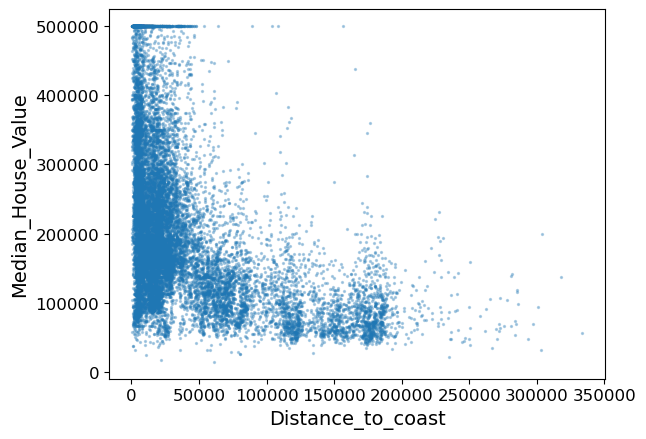

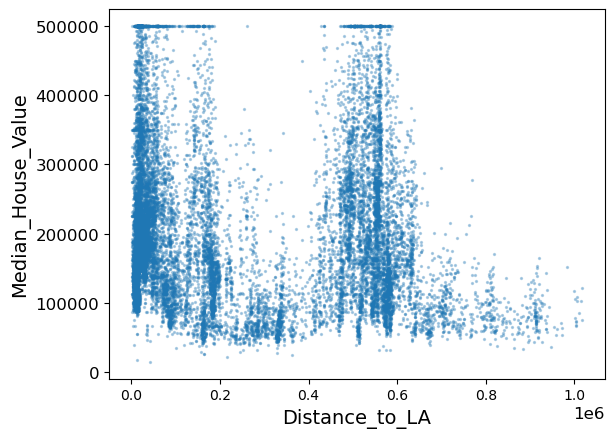

In [52]:
## Your code here ##
for i in most_important_correlations.loc[mask].index:
    houses_df.plot(kind="scatter",x=i,y="Median_House_Value",s=2, alpha=0.3)
plt.xticks(fontsize=10)
plt.show()

### *``Your answers here``*

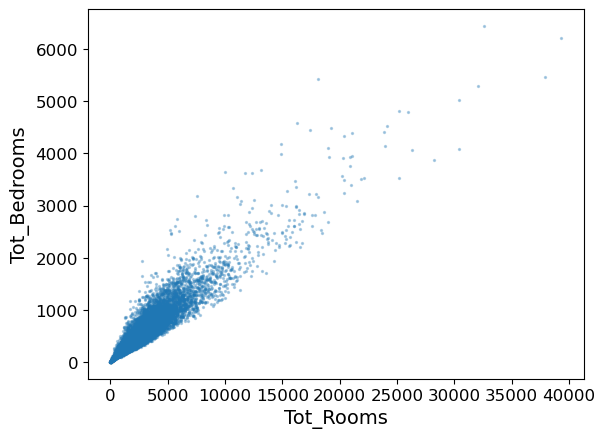

In [53]:
houses_df.plot(kind="scatter",x="Tot_Rooms",y="Tot_Bedrooms",s=2, alpha=0.3)
plt.show()

- What special observations are you drawing from these scatter plots?
- Is the total number of rooms or bedrooms per district meaningful ?
- If so explain why, if not what are your suggestions ?

We can see that their plots with Median_House_Value show an obvious correlation.
The 2 scatter plot are quite similar.
But the Pearson's r of Tot_Rooms suggest a small sife effect.
And the Pearson's r of Tot_Bedrooms suggest a negligeable sife effect.

As a consequence, only Tot_Rooms is meaninful regarding the Median_House_Value.

The scatter plot bewtween Tot_Rooms and Tot_Bedrooms shows a very clear correlation.
Moreover we can see that the Pearson'r r between these 2 columns is 0.93 that is very large.

We suggest that Tot_Rooms and Tot_Bedrooms are linearly correlated.
So we suggest to drop the column with the smallest effect size with Median_House_Value: Tot_Bedrooms to drop.


**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [55]:
houses_df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Closest_city',
       'income_cat'],
      dtype='object')

In [61]:
houses_df["Rooms_per_household"]=houses_df["Tot_Rooms"]/houses_df["Households"]

In [62]:
houses_df["Bedrooms_per_rooms"]=houses_df["Tot_Bedrooms"]/houses_df["Tot_Rooms"]

In [63]:
houses_df["People_per_household"]=houses_df["Population"]/houses_df["Households"]

In [64]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              16512 non-null  int64   
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

In [65]:
display(houses_df.head())

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816          10       7136          1691   
17718            355300.0         7.2707           8       3088           474   
19928             87700.0         3.6895          29       2409           436   
13782            104600.0         1.3993          28       3009           698   
18138            351500.0         5.2108          31       3344           620   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405         2959        1507     37.96    -122.06       10235.180749   
17718        1799         456     37.33    -121.77       31247.007622   
19928        1142         440     36.32    -119.32      173659.998787   
13782        1200         626     34.03    -117.05       87439.318166   
18138        1604         572     37.34    -122.00       16588.263207   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
1405    553643.787458         732888.478075         70982.348385   
17718   483915.911504         662665.139516         10894.463096   
19928   270464.275712         446891.969226        255323.112233   
13782   110013.263123         146503.069766        571187.737490   
18138   498617.985733         676926.890759          9470.548635   

       Distance_to_SanFrancisco  Closest_city income_cat  Rooms_per_household  \
1405               38602.906675  SanFrancisco          4             4.735236   
17718              76391.177725       SanJose          5             6.771930   
19928             319946.815485       SanJose          3             5.475000   
13782             638724.634162            LA          1             4.806709   
18138              61432.768974       SanJose          5             5.846154   

       Bedrooms_per_rooms  People_per_household  
1405             0.236967              1.963504  
17718            0.153497              3.945175  
19928            0.180988              2.595455  
13782            0.231971              1.916933  
18138            0.185407              2.804196

**Let us again look at the correlation between the predictors and the target**

['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Rooms_per_household', 'Bedrooms_per_rooms', 'People_per_household']


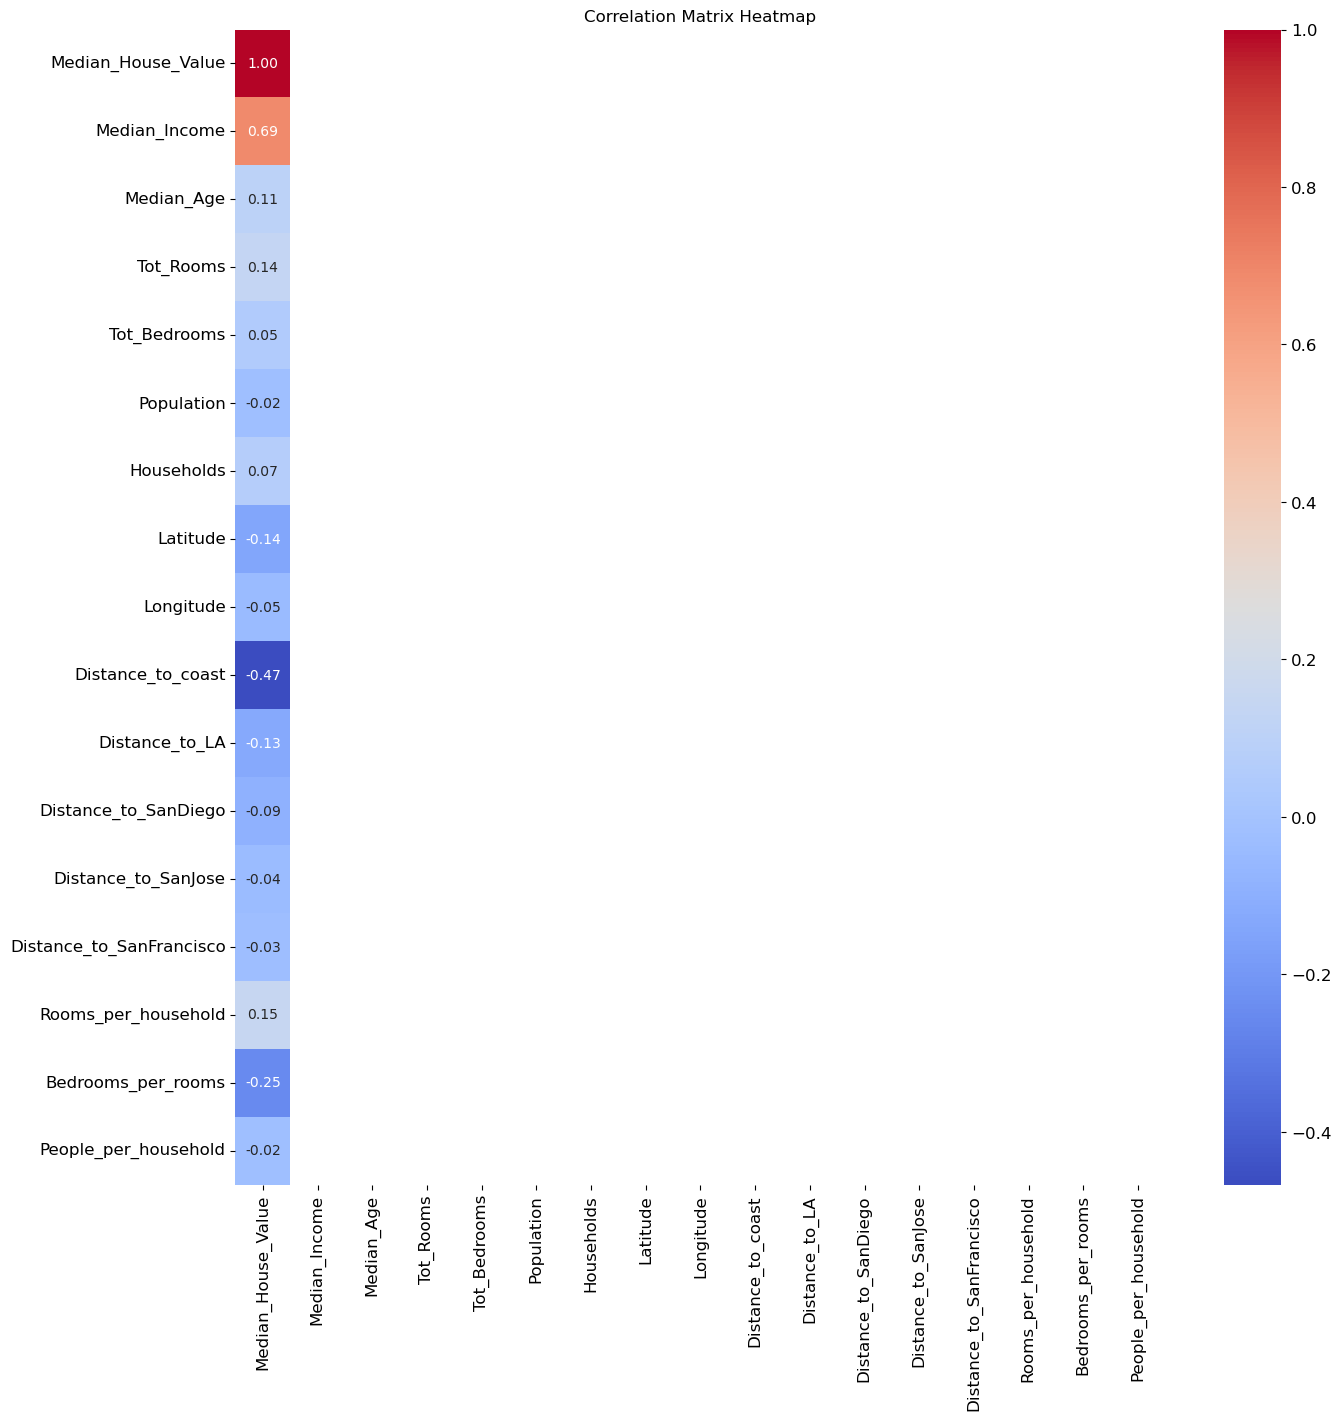

In [66]:
## Your code here ##
quant_cols=[]
for i in houses_df:
    if houses_df[i].dtype in ["int64","float64"]:
        quant_cols.append(i)
print(quant_cols)

houses_cor=houses_df[quant_cols].corr()

mask = np.zeros_like(houses_cor)
mask[:, 1:] = True

plt.figure(figsize=(15,15))
sns.heatmap(houses_cor, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.show()

In [67]:
houses_df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Closest_city',
       'income_cat', 'Rooms_per_household', 'Bedrooms_per_rooms',
       'People_per_household'],
      dtype='object')

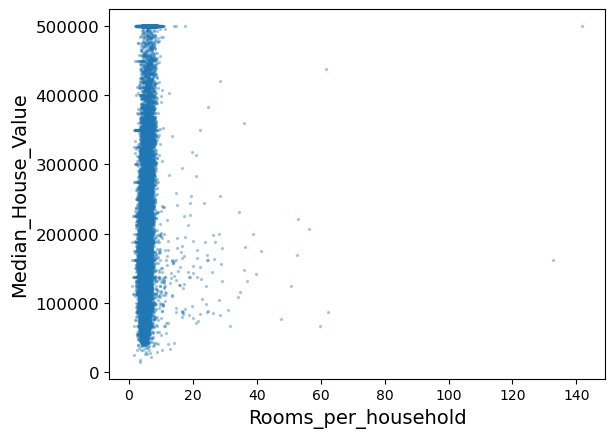

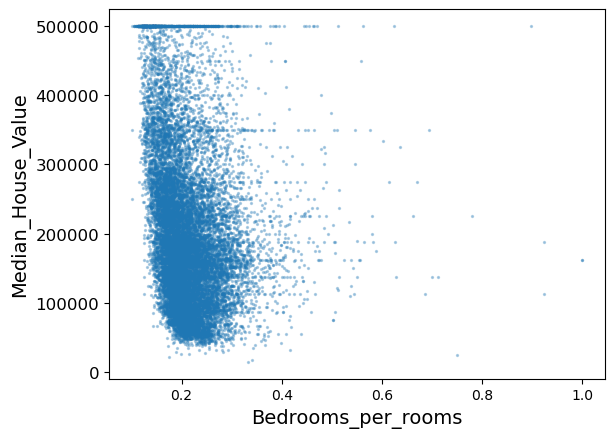

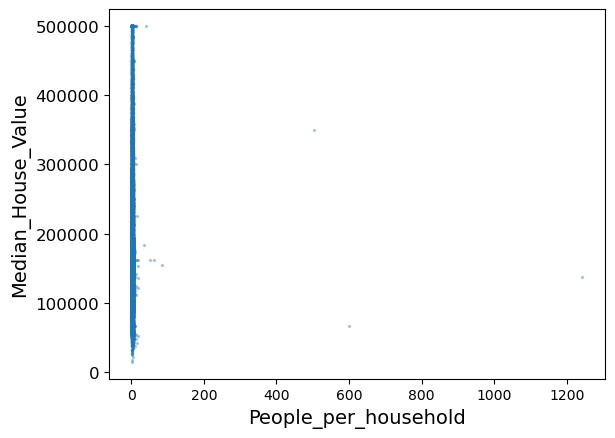

In [68]:
for i in quant_cols:
    if i in ['Rooms_per_household', 'Bedrooms_per_rooms','People_per_household']:
        houses_df.plot(kind="scatter",x=i,y="Median_House_Value",s=2, alpha=0.3)
        plt.xticks(fontsize=10)
plt.show()

# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

### *``Comment on each of the following cells``*

In [69]:
len(houses_df)

16512

In [70]:
## Your comment here ##
"""
We create an array with 1651 (=10% of len(houses_df)) values randomly picked from the index of the dataframe houses_df.
The random seed chosen is 42.
This array is called "miss".
"""

import random
random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [71]:
miss

array([19624, 15938, 17477, ..., 11819, 13609,  5299])

In [72]:
## Your comment here ##
# we save our houses_df so we create a copy of it and name it "houses_miss"

houses_miss = houses_df.copy()

In [73]:
## Your comment here ##
"""
Then we replace values from the dataframe houses_miss.
To do so we use .loc() method of pandas and use the array "miss" for index names and column "Tot_Bedrooms".
And we replace each value with None.
"""

houses_miss.loc[miss,"Tot_Bedrooms"] = None

In [74]:
## Your comment here ##
# we check our dataframe houses_miss and look at the "Tot_Bedrooms" column 
# to see that we now have only 14928 non-null values instead of 16512

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              14950 non-null  float64 
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [75]:
## Your comment here ##
# 1/ We simply drop the rows associated to the missing values

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [76]:
## Your comment here ##

houses_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14950 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        14950 non-null  float64 
 1   Median_Income             14950 non-null  float64 
 2   Median_Age                14950 non-null  int64   
 3   Tot_Rooms                 14950 non-null  int64   
 4   Tot_Bedrooms              14950 non-null  float64 
 5   Population                14950 non-null  int64   
 6   Households                14950 non-null  int64   
 7   Latitude                  14950 non-null  float64 
 8   Longitude                 14950 non-null  float64 
 9   Distance_to_coast         14950 non-null  float64 
 10  Distance_to_LA            14950 non-null  float64 
 11  Distance_to_SanDiego      14950 non-null  float64 
 12  Distance_to_SanJose       14950 non-null  float64 
 13  Distance_to_SanFrancisco  14950 non-null  fl

In [77]:
## Your comment here ##
# 2/ We estimate the missing values through an imputation method - the simplest and safest is to use the median

Bed_med = houses_miss["Tot_Bedrooms"].median()
houses_miss["Tot_Bedrooms"].fillna(Bed_med, inplace=True)

In [78]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              16512 non-null  float64 
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [79]:
def col_miss (df, col, max_miss):
    '''
    df : a pandas dataframe
    col : the name of the variable column
    max_miss : the maximum number of missing values
    returns a data frame with a random number of missing values on col
    '''

    ########################################
    ## Your lines of code here            ##
    ########################################
    import random
    random.seed(42)
    
    number = random.randint(0, max_miss+1)
    
    miss = np.random.choice(df.index, number)
    df.loc[miss,col] = None
    
    return df

In [80]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              16512 non-null  int64   
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

Generate some missing values in the first 10 predictors of \<housing_miss>

In [83]:
## Your code here ##  

count=0
for i in range(10):
    #this is a trick to avoid put missing value in the predicted column and to ensure to have 10 columns with missing values
    if housing_miss.columns[i]=="Median_House_Value":
        col_miss(housing_miss, housing_miss.columns[10], 4000)
        count+=1
    if housing_miss.columns[i]!="Median_House_Value":
        col_miss(housing_miss, housing_miss.columns[i], 4000)
        count+=1
print(count)

10


In [84]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             14070 non-null  float64 
 2   Median_Age                14109 non-null  float64 
 3   Tot_Rooms                 14082 non-null  float64 
 4   Tot_Bedrooms              14081 non-null  float64 
 5   Population                14071 non-null  float64 
 6   Households                14106 non-null  float64 
 7   Latitude                  14079 non-null  float64 
 8   Longitude                 14104 non-null  float64 
 9   Distance_to_coast         14117 non-null  float64 
 10  Distance_to_LA            14106 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

Now, we have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [85]:
## Your code here ##
housing_miss.isnull().sum()

Median_House_Value             0
Median_Income               2442
Median_Age                  2403
Tot_Rooms                   2430
Tot_Bedrooms                2431
Population                  2441
Households                  2406
Latitude                    2433
Longitude                   2408
Distance_to_coast           2395
Distance_to_LA              2406
Distance_to_SanDiego           0
Distance_to_SanJose            0
Distance_to_SanFrancisco       0
Closest_city                   0
income_cat                     0
Rooms_per_household            0
Bedrooms_per_rooms             0
People_per_household           0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [86]:
# Start with simple imputer
from sklearn.impute import SimpleImputer


**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [87]:
housing_miss

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816        10.0     7136.0        1691.0   
17718            355300.0            NaN         8.0     3088.0         474.0   
19928             87700.0         3.6895         NaN     2409.0         436.0   
13782            104600.0         1.3993        28.0     3009.0         698.0   
18138            351500.0         5.2108        31.0     3344.0         620.0   
...                   ...            ...         ...        ...           ...   
12704            141400.0         3.0890        18.0     6955.0        1882.0   
9894             156100.0         2.6518         NaN     1739.0         318.0   
19836             65000.0         2.7500        28.0     2201.0         429.0   
18146            292900.0         7.2779        16.0     1156.0         198.0   
4028             457300.0         5.4088        39.0     1819.0         291.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405       2959.0      1507.0     37.96    -122.06                NaN   
17718      1799.0       456.0     37.33    -121.77       31247.007622   
19928      1142.0       440.0       NaN    -119.32      173659.998787   
13782         NaN       626.0       NaN    -117.05       87439.318166   
18138      1604.0       572.0     37.34    -122.00       16588.263207   
...           ...         ...       ...        ...                ...   
12704      2803.0      1740.0     38.58    -121.41       58281.418431   
9894        744.0       312.0     38.29    -122.30       17440.080774   
19836         NaN       412.0     36.53    -119.40      182487.335025   
18146       455.0       216.0     37.35    -122.03       14704.872231   
4028        770.0       278.0     34.18    -118.56       16513.647022   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
1405    553643.787458         732888.478075         70982.348385   
17718   483915.911504         662665.139516         10894.463096   
19928   270464.275712         446891.969226        255323.112233   
13782   110013.263123         146503.069766        571187.737490   
18138   498617.985733         676926.890759          9470.548635   
...               ...                   ...                  ...   
12704   577789.109685         756473.518957        144718.421719   
9894              NaN         774665.560654        111996.740634   
19836   294818.684969         470972.489657        238993.311335   
18146   501260.909682         679529.217759         12215.809050   
4028     32400.440818         208214.291536        462057.646213   

       Distance_to_SanFrancisco  Closest_city income_cat  Rooms_per_household  \
1405               38602.906675  SanFrancisco          4             4.735236   
17718              76391.177725       SanJose          5             6.771930   
19928             319946.815485       SanJose          3             5.475000   
13782             638724.634162            LA          1             4.806709   
18138              61432.768974       SanJose          5             5.846154   
...                         ...           ...        ...                  ...   
12704             126498.948934  SanFrancisco          2             3.997126   
9894               58520.658753  SanFrancisco          2             5.573718   
19836             302148.780961       SanJose          2             5.342233   
18146              58937.732074       SanJose          5             5.351852   
4028              530037.676836            LA          5             6.543165   

       Bedrooms_per_rooms  People_per_household  
1405             0.236967              1.963504  
17718            0.153497              3.945175  
19928            0.180988              2.595455  
13782            0.231971              1.916933  
18138            0.185407              2.804196  
...                   ...                   ...  
12704            

In [88]:
cols=[x for x in housing_miss.columns if housing_miss[x].dtype == "float64"]
cols

['Median_House_Value',
 'Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'Distance_to_coast',
 'Distance_to_LA',
 'Distance_to_SanDiego',
 'Distance_to_SanJose',
 'Distance_to_SanFrancisco',
 'Rooms_per_household',
 'Bedrooms_per_rooms',
 'People_per_household']

In [89]:
## Your code here ##
X = pd.DataFrame(SimpleImputer().fit_transform(housing_miss[cols]), columns = cols)

X.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            182000.0       3.981600   10.000000     7136.0        1691.0   
1            355300.0       3.869906    8.000000     3088.0         474.0   
2             87700.0       3.689500   28.637536     2409.0         436.0   
3            104600.0       1.399300   28.000000     3009.0         698.0   
4            351500.0       5.210800   31.000000     3344.0         620.0   

    Population  Households   Latitude  Longitude  Distance_to_coast  \
0  2959.000000      1507.0  37.960000    -122.06       40066.991181   
1  1799.000000       456.0  37.330000    -121.77       31247.007622   
2  1142.000000       440.0  35.646074    -119.32      173659.998787   
3  1423.445313       626.0  35.646074    -117.05       87439.318166   
4  1604.000000       572.0  37.340000    -122.00       16588.263207   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   553643.787458         732888.478075         70982.348385   
1   483915.911504         662665.139516         10894.463096   
2   270464.275712         446891.969226        255323.112233   
3   110013.263123         146503.069766        571187.737490   
4   498617.985733         676926.890759          9470.548635   

   Distance_to_SanFrancisco  Rooms_per_household  Bedrooms_per_rooms  \
0              38602.906675             4.735236            0.236967   
1              76391.177725             6.771930            0.153497   
2             319946.815485             5.475000            0.180988   
3             638724.634162             4.806709            0.231971   
4              61432.768974             5.846154            0.185407   

   People_per_household  
0              1.963504  
1              3.945175  
2              2.595455  
3              1.916933  
4              2.804196

In [90]:
type(X)

pandas.core.frame.DataFrame

In [91]:
X_df = pd.DataFrame(X, columns=cols)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        16512 non-null  float64
 1   Median_Income             16512 non-null  float64
 2   Median_Age                16512 non-null  float64
 3   Tot_Rooms                 16512 non-null  float64
 4   Tot_Bedrooms              16512 non-null  float64
 5   Population                16512 non-null  float64
 6   Households                16512 non-null  float64
 7   Latitude                  16512 non-null  float64
 8   Longitude                 16512 non-null  float64
 9   Distance_to_coast         16512 non-null  float64
 10  Distance_to_LA            16512 non-null  float64
 11  Distance_to_SanDiego      16512 non-null  float64
 12  Distance_to_SanJose       16512 non-null  float64
 13  Distance_to_SanFrancisco  16512 non-null  float64
 14  Rooms_

In [92]:
X_df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            182000.0       3.981600   10.000000     7136.0        1691.0   
1            355300.0       3.869906    8.000000     3088.0         474.0   
2             87700.0       3.689500   28.637536     2409.0         436.0   
3            104600.0       1.399300   28.000000     3009.0         698.0   
4            351500.0       5.210800   31.000000     3344.0         620.0   

    Population  Households   Latitude  Longitude  Distance_to_coast  \
0  2959.000000      1507.0  37.960000    -122.06       40066.991181   
1  1799.000000       456.0  37.330000    -121.77       31247.007622   
2  1142.000000       440.0  35.646074    -119.32      173659.998787   
3  1423.445313       626.0  35.646074    -117.05       87439.318166   
4  1604.000000       572.0  37.340000    -122.00       16588.263207   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   553643.787458         732888.478075         70982.348385   
1   483915.911504         662665.139516         10894.463096   
2   270464.275712         446891.969226        255323.112233   
3   110013.263123         146503.069766        571187.737490   
4   498617.985733         676926.890759          9470.548635   

   Distance_to_SanFrancisco  Rooms_per_household  Bedrooms_per_rooms  \
0              38602.906675             4.735236            0.236967   
1              76391.177725             6.771930            0.153497   
2             319946.815485             5.475000            0.180988   
3             638724.634162             4.806709            0.231971   
4              61432.768974             5.846154            0.185407   

   People_per_household  
0              1.963504  
1              3.945175  
2              2.595455  
3              1.916933  
4              2.804196

**Using KNNImputer, impute missing data in each variable**

In [93]:
## Your code here ##
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X[cols]=imputer.fit_transform(housing_miss[cols])
print(type(X))

X = pd.DataFrame(X, columns = cols)
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [94]:
## Your code here ##
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        16512 non-null  float64
 1   Median_Income             16512 non-null  float64
 2   Median_Age                16512 non-null  float64
 3   Tot_Rooms                 16512 non-null  float64
 4   Tot_Bedrooms              16512 non-null  float64
 5   Population                16512 non-null  float64
 6   Households                16512 non-null  float64
 7   Latitude                  16512 non-null  float64
 8   Longitude                 16512 non-null  float64
 9   Distance_to_coast         16512 non-null  float64
 10  Distance_to_LA            16512 non-null  float64
 11  Distance_to_SanDiego      16512 non-null  float64
 12  Distance_to_SanJose       16512 non-null  float64
 13  Distance_to_SanFrancisco  16512 non-null  float64
 14  Rooms_

### Which imputer is better : SimpleImputer or KNNImputer ?
Please give some arguments

### *``Your answers here``*

In [97]:
def compare_df(df, df_impute):
    from sklearn.metrics import mean_squared_error as mse
    reg_error = []
    for col in df.columns:
        reg_error.append(mse(df[col],df_impute[col]))
    return reg_error

In [98]:
mse_simple_KNN = pd.DataFrame(np.transpose([compare_df(X_df, houses_df), compare_df(X, houses_df), np.array(compare_df(X_df, houses_df))/ np.array(compare_df(X, houses_df))*100]), columns = ['MSE SimpleImputer','MSE KNN','Difference %'])
display(mse_simple_KNN)

MSE SimpleImputer       MSE KNN   Difference %
0        0.000000e+00  0.000000e+00            NaN
1        5.172200e-01  2.412992e-01     214.348002
2        2.294163e+01  1.499730e+01     152.971681
3        7.206005e+05  7.002027e+05     102.913126
4        2.402272e+04  2.286257e+04     105.074441
5        1.699929e+05  1.513893e+05     112.288605
6        2.337346e+04  1.908192e+04     122.490097
7        6.672551e-01  6.715782e-04   99356.273735
8        5.844353e-01  1.211234e-03   48251.221837
9        3.570846e+08  1.444769e+07    2471.568105
10       8.803490e+09  2.032790e+06  433074.295248
11       0.000000e+00  0.000000e+00            NaN
12       0.000000e+00  0.000000e+00            NaN
13       0.000000e+00  0.000000e+00            NaN
14       0.000000e+00  0.000000e+00            NaN
15       0.000000e+00  0.000000e+00            NaN
16       0.000000e+00  0.000000e+00            NaN

In [99]:
#We can see that the KNN imputer is much better as his MSE are lower than for the SimpleImputer (much lower)

## 2.2 - Categorical variables...

In [100]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              16512 non-null  int64   
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

### *``Your answers here``*

Nominal and ordinal are both categorical adjectives.

Ordinal means that the categorical value of the column are classified in comparaison to each others.
There is a hierarchical order between the values. For exemple: Average < Good < Very good. In our case: 1<2<3<4<5.

Nominal means that there are categorical values but not hierarchical relation between them.

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, both categorical variables should be considered nominal**

### *So, what is one hot encoding ?*

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [103]:
for i in houses_df.columns:
    if i not in cat_cols and houses_df[i].dtype=="category":
        cat_cols.append(i)
cat_cols

['Closest_city', 'income_cat']

In [104]:
for i in cat_cols:
    print(houses_df[i].value_counts())

LA              7822
SanFrancisco    4064
SanJose         3036
SanDiego        1590
Name: Closest_city, dtype: int64
2    3305
1    3304
4    3302
5    3302
3    3299
Name: income_cat, dtype: int64


In [105]:
# Let us select our categorical variables
houses_cat = houses_df[["Closest_city","income_cat"]]

In [106]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE
onehot = OHE(sparse=False)
houses_onehot = onehot.fit_transform(houses_cat)

In [107]:
houses_onehot

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [108]:
onehot.categories_

[array(['LA', 'SanDiego', 'SanFrancisco', 'SanJose'], dtype=object),
 array([1, 2, 3, 4, 5])]

In [109]:
onehot_column_names = OHE.get_feature_names_out(onehot)
onehot_column_names

array(['Closest_city_LA', 'Closest_city_SanDiego',
       'Closest_city_SanFrancisco', 'Closest_city_SanJose',
       'income_cat_1', 'income_cat_2', 'income_cat_3', 'income_cat_4',
       'income_cat_5'], dtype=object)

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [110]:
Ata# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Median_House_Value        16512 non-null  float64 
 1   Median_Income             16512 non-null  float64 
 2   Median_Age                16512 non-null  int64   
 3   Tot_Rooms                 16512 non-null  int64   
 4   Tot_Bedrooms              16512 non-null  int64   
 5   Population                16512 non-null  int64   
 6   Households                16512 non-null  int64   
 7   Latitude                  16512 non-null  float64 
 8   Longitude                 16512 non-null  float64 
 9   Distance_to_coast         16512 non-null  float64 
 10  Distance_to_LA            16512 non-null  float64 
 11  Distance_to_SanDiego      16512 non-null  float64 
 12  Distance_to_SanJose       16512 non-null  float64 
 13  Distance_to_SanFrancisco  16512 non-null  fl

Let us start with a custom transformer to be used to add attributes

In [111]:
housing_df.values

array([[182000.0, 3.9816, 10, ..., 38602.9066754153, 'SanFrancisco', 4],
       [355300.0, 7.2707, 8, ..., 76391.1777254526, 'SanJose', 5],
       [87700.0, 3.6895, 29, ..., 319946.815484912, 'SanJose', 3],
       ...,
       [65000.0, 2.75, 28, ..., 302148.780961118, 'SanJose', 2],
       [292900.0, 7.2779, 16, ..., 58937.7320743468, 'SanJose', 5],
       [457300.0, 5.4088, 39, ..., 530037.676836176, 'LA', 5]],
      dtype=object)

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [113]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
houses_plus = attr_adder.transform(housing_df.values)

In [114]:
test=pd.DataFrame(houses_plus)
test.head()

0       1   2     3     4     5     6      7       8              9   \
0  182000.0  3.9816  10  7136  1691  2959  1507  37.96 -122.06   10235.180749   
1  355300.0  7.2707   8  3088   474  1799   456  37.33 -121.77   31247.007622   
2   87700.0  3.6895  29  2409   436  1142   440  36.32 -119.32  173659.998787   
3  104600.0  1.3993  28  3009   698  1200   626  34.03 -117.05   87439.318166   
4  351500.0  5.2108  31  3344   620  1604   572  37.34  -122.0   16588.263207   

              10             11             12             13            14  \
0  553643.787458  732888.478075   70982.348385   38602.906675  SanFrancisco   
1  483915.911504  662665.139516   10894.463096   76391.177725       SanJose   
2  270464.275712  446891.969226  255323.112233  319946.815485       SanJose   
3  110013.263123  146503.069766   571187.73749  638724.634162            LA   
4  498617.985733  676926.890759    9470.548635   61432.768974       SanJose   

  15        16        17  
0  4  4.735236  1.963504  
1  5   6.77193  3.945175  
2  3     5.475  2.595455  
3  1  4.806709  1.916933  
4  5  5.846154  2.804196

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

### *``Your answers here``*

First we import the 2 functions BaseEstimator, TransformerMixin from sklearn.base.

Then we store the corresponding index of 'Tot_Rooms', 'Tot_Bedrooms', 'Population' and 'Households' columns into variables rooms_ix, bedrooms_ix, population_ix, households_ix

Then we create a class CombinedAttributesAdder which pass 2 sklearn classes as arguments: (BaseEstimator, TransformerMixin).

So we'll be able to use the function of those classes within our class.
From stackoverflow:
https://stackoverflow.com/questions/72729841/why-should-we-use-baseestimator-and-transformermixmin-from-sklearn-base-in-pytho
"Why should we use BaseEstimator and Transformermixmin from sklearn.base in python to create or custom class?
BaseEstimator implements get_params and set_params for you, assuming you adhere to the requirements for the __init__ method.

These two methods allow your custom transformer to be cloned and hyperparameter-tuned using GridSearchCV or RandomizedSearchCV.
It also provides a printing method to print either text or html representation of your estimator.
It also contains some common input validation methods, and more recently, feature name handling.

TransformerMixin implements fit_transform as fit followed by transform. 
It's convenient, although not nearly so much as a BaseEstimator.""

Within our class, we create 3 methods:
1/ The constructor __init__ which use one argument add_bedrooms_per_room which is set True by default if nothing is specified.
2/ fit method is implemented but does nothing. In scikit-learn, transformers typically don't require fitting, so this method just returns self.
3/ transform which take X as an argument (a dataframe).

This create arrays that are ratios from the columns we stored the index before: rooms_per_household, population_per_household and bedrooms_per_room.
bedrooms_per_room is an option: if the Boolean add_bedrooms_per_room is False, then we create this ratio.

This function return a concatenated array where each array is a row of the transformed dataframe (original dataframe + 2 or 3 new rows).

This class create an object which can be defined as a transformer.

If we put those arrays into a dataframe, we will have to set new column name as they'll be numbers,
 and also set the type of each columns again because they became object.

In [116]:
houses_plus_df = pd.DataFrame(houses_plus,
                              columns=list(housing_df.columns)+["rooms_per_household", "population_per_household"],
                              index=housing_df.index)

houses_plus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Median_House_Value        16512 non-null  object
 1   Median_Income             16512 non-null  object
 2   Median_Age                16512 non-null  object
 3   Tot_Rooms                 16512 non-null  object
 4   Tot_Bedrooms              16512 non-null  object
 5   Population                16512 non-null  object
 6   Households                16512 non-null  object
 7   Latitude                  16512 non-null  object
 8   Longitude                 16512 non-null  object
 9   Distance_to_coast         16512 non-null  object
 10  Distance_to_LA            16512 non-null  object
 11  Distance_to_SanDiego      16512 non-null  object
 12  Distance_to_SanJose       16512 non-null  object
 13  Distance_to_SanFrancisco  16512 non-null  object
 14  Closest_city        

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [117]:
mylist=list(housing_miss.columns[0:12])
mylist


['Median_House_Value',
 'Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'Distance_to_coast',
 'Distance_to_LA',
 'Distance_to_SanDiego']

In [118]:
mylist.append("Closest_city")
mylist.append("income_cat")
print(mylist)

['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Closest_city', 'income_cat']


In [119]:
train = housing_miss[mylist]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         14070 non-null  float64 
 2   Median_Age            14109 non-null  float64 
 3   Tot_Rooms             14082 non-null  float64 
 4   Tot_Bedrooms          14081 non-null  float64 
 5   Population            14071 non-null  float64 
 6   Households            14106 non-null  float64 
 7   Latitude              14079 non-null  float64 
 8   Longitude             14104 non-null  float64 
 9   Distance_to_coast     14117 non-null  float64 
 10  Distance_to_LA        14106 non-null  float64 
 11  Distance_to_SanDiego  16512 non-null  float64 
 12  Closest_city          16512 non-null  category
 13  income_cat            16512 non-null  category
dtypes: category(2), float64(12)
memory usage: 2.2 MB


In [120]:
quanti_features = list(train.columns[1:10])
cat_features = ["Closest_city","income_cat"]
train_quanti = train[quanti_features]

In [121]:
train_quanti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Median_Income      14070 non-null  float64
 1   Median_Age         14109 non-null  float64
 2   Tot_Rooms          14082 non-null  float64
 3   Tot_Bedrooms       14081 non-null  float64
 4   Population         14071 non-null  float64
 5   Households         14106 non-null  float64
 6   Latitude           14079 non-null  float64
 7   Longitude          14104 non-null  float64
 8   Distance_to_coast  14117 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # this will add 3 attributes
        ('std_scaler', StandardScaler()),
    ])

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

In [123]:
houses_quanti

array([[ 0.09138857, -1.60710403,  2.29463452, ...,  2.65584032,
         2.59159972, -0.1607192 ],
       [-0.15799407, -1.77907614,  0.26614033, ..., -0.18651903,
        -0.14725191,  0.07697465],
       [-0.07589738,  0.0266311 , -0.07411351, ..., -0.18429368,
        -0.08508518, -0.05969075],
       ...,
       [-0.61394995, -0.05935496, -0.17834444, ..., -0.271639  ,
        -0.24062286, -0.04795267],
       [ 1.9791828 , -1.09118767, -0.70200462, ..., -0.84659905,
        -0.78823447, -0.09702516],
       [ 0.9087474 ,  0.88649169, -0.36976854, ..., -0.55989882,
        -0.55402573, -0.0565786 ]])

In [126]:
testest = pd.DataFrame(houses_quanti,
                              columns=list(train_quanti.columns)+["rooms_per_household", "population_per_household","bedrooms_per_room"],
                              index=train_quanti.index)

testest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_Income             16512 non-null  float64
 1   Median_Age                16512 non-null  float64
 2   Tot_Rooms                 16512 non-null  float64
 3   Tot_Bedrooms              16512 non-null  float64
 4   Population                16512 non-null  float64
 5   Households                16512 non-null  float64
 6   Latitude                  16512 non-null  float64
 7   Longitude                 16512 non-null  float64
 8   Distance_to_coast         16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
dtypes: float64(12)
memory usage: 2.1 MB


#### Explain the previous cells of codes and what they aim to accomplish


The primary aim of this code is to preprocess the train_quanti dataset by:
Filling in missing values using the median of each column.
Adding three new attributes to the dataset.
Standardizing the features to simplify the workflow of machine learning models. This can be important for certain machine learning models which assume that the features are normally distributed with mean 0 and variance 1



The primary aim of this code is to preprocess the train_quanti dataset by:
Filling in missing values using the median of each column.
Adding three new attributes to the dataset.
Standardizing the features to have a mean of 0 and a standard deviation of 1


**How many features should we have at this step ?** 

In [127]:
## Justify your answer with a code here ##
"""
At this step we should have as many features as there is quantitative columns in our dataframe minus the target
plus 2 or 3 new columns which are ratios created by the pipeline.

But as we choose only quanti_features = list(train.columns[1:10]) we have less: 9+3=12
"""
nb_features= sum(1 for x in train.columns if train[x].dtype == 'float64') - 1 +3
print(nb_features)

nb_features= sum(1 for x in train.columns[1:10] if train[x].dtype == 'float64') +3
print(nb_features)

14
12


### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [128]:
train.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Closest_city', 'income_cat'],
      dtype='object')

In [129]:
quanti_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

In [130]:
quanti_features

['Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'Distance_to_coast']

In [131]:
OHE()

OneHotEncoder()

In [132]:
cat_features

['Closest_city', 'income_cat']

In [133]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

'\n\n                       I MODIFIED THIS WITH UPCOMONG CELLS\n\n\nhouses_ready = pd.DataFrame(full_pipeline.fit_transform(train),columns=[\n \'Median_Income\',\n \'Median_Age\',\n \'Tot_Rooms\',\n \'Tot_Bedrooms\',\n \'Population\',\n \'Households\',\n \'Latitude\',\n \'Longitude\',\n \'Distance_to_coast\',\n \'Rooms_per_household\',"Bedrooms_per_room",\n\n \'Population_per_household\',\n \'Closest_LA\',\'Closest_SD\',\'Closest_SF\',\'Closest_SJ\',"Income_1","Income_2","Income_3","Income_4","Income_5"\n                                                                        ])\n'

In [134]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Median_Income', 'Median_Age', 'Tot_Rooms',
                                  'Tot_Bedrooms', 'Population', 'Households',
                                  'Latitude', 'Longitude',
                                  'Distance_to_coast']),
                                ('cat', OneHotEncoder(),
                                 ['Closest_city', 'income_cat'])])

In [135]:
houses_ready = pd.DataFrame(full_pipeline.fit_transform(train),columns=quanti_features
                            +['Rooms_per_household',"Bedrooms_per_room",'Population_per_household']
                            +list(onehot_column_names),
                            index=train_quanti.index)

In [136]:
houses_ready.head()

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
1405        0.091389   -1.607104   2.294635      2.995785    1.487793   
17718      -0.157994   -1.779076   0.266140     -0.121389    0.390953   
19928      -0.075897    0.026631  -0.074114     -0.218721   -0.230275   
13782      -1.387497   -0.059355   0.226553      0.452355   -0.206636   
18138       0.795353    0.198603   0.394425      0.252569    0.206570   

       Households  Latitude  Longitude  Distance_to_coast  \
1405     2.930306  1.237475  -1.393429          -0.370192   
17718   -0.076466  0.927699  -1.240295          -0.131259   
19928   -0.122240 -0.576927   0.053423           3.002207   
13782    0.409882 -0.576927   1.252093           1.105122   
18138    0.255395  0.932616  -1.361746          -0.453790   

       Rooms_per_household  ...  Population_per_household  Closest_city_LA  \
1405              2.655840  ...                 -0.160719              0.0   
17718            -0.186519  ...                  0.076975              0.0   
19928            -0.184294  ...                 -0.059691              0.0   
13782             0.497991  ...                 -0.169775              1.0   
18138             0.162123  ...                 -0.063429              0.0   

       Closest_city_SanDiego  Closest_city_SanFrancisco  Closest_city_SanJose  \
1405                     0.0                        1.0                   0.0   
17718                    0.0                        0.0                   1.0   
19928                    0.0                        0.0                   1.0   
13782                    0.0                        0.0                   0.0   
18138                    0.0                        0.0                   1.0   

       income_cat_1  income_cat_2  income_cat_3  income_cat_4  income_cat_5  
1405            0.0           0.0           0.0           1.0           0.0  
17718           0.0           0.0           0.0           0.0           1.0  
19928           0.0           0.0           1.0           0.0           0.0  
13782           1.0           0.0           0.0           0.0           0.0  
18138           0.0           0.0           0.0           0.0           1.0  

[5 rows x 21 columns]

In [137]:
houses_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Median_Income              16512 non-null  float64
 1   Median_Age                 16512 non-null  float64
 2   Tot_Rooms                  16512 non-null  float64
 3   Tot_Bedrooms               16512 non-null  float64
 4   Population                 16512 non-null  float64
 5   Households                 16512 non-null  float64
 6   Latitude                   16512 non-null  float64
 7   Longitude                  16512 non-null  float64
 8   Distance_to_coast          16512 non-null  float64
 9   Rooms_per_household        16512 non-null  float64
 10  Bedrooms_per_room          16512 non-null  float64
 11  Population_per_household   16512 non-null  float64
 12  Closest_city_LA            16512 non-null  float64
 13  Closest_city_SanDiego      16512 non-null  f

**How many features should we have at this step ? Explain !**

In [139]:
## Justify your answer with a code here ##
"""
We called our pipeline full_pipeline which calls the pipeline/transformer quanti_pipeline with quanti_features list of columns.
The quanti_features contains 9 features at this point.
quanti_features calls CombinedAttributesAdder() without specifying anything so add_bedrooms_per_room = True.
So we had 3 ratio features.

full_pipeline also calls OHE() on cat_features=['Closest_city', 'income_cat'].
Those categories count 4 and 5 modalities each.
That adds 9 other columns (=features).

The total number of features = 9 + 3 + 9 = 21
"""
total_nb_features=len(quanti_features)+3+len(onehot_column_names)
total_nb_features

21

# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [140]:
Atahouses_ready.columns

Index(['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Rooms_per_household', 'Bedrooms_per_room',
       'Population_per_household', 'Closest_city_LA', 'Closest_city_SanDiego',
       'Closest_city_SanFrancisco', 'Closest_city_SanJose', 'income_cat_1',
       'income_cat_2', 'income_cat_3', 'income_cat_4', 'income_cat_5'],
      dtype='object')

In [141]:
y = houses_df["Median_House_Value"]
X = houses_ready[['Median_Age',
       'Distance_to_coast', 'Rooms_per_household', 'Bedrooms_per_room',
       'Population_per_household', 'Closest_city_LA', 'Closest_city_SanDiego',
       'Closest_city_SanFrancisco', 'Closest_city_SanJose', 'income_cat_1',
       'income_cat_2', 'income_cat_3', 'income_cat_4', 'income_cat_5']]

## 3.1 - Learning and evaluating with the training set only

#### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [142]:
from sklearn.linear_model import SGDRegressor #stochastic gradient descent
model1 = SGDRegressor(max_iter=1000, alpha=0.01,random_state=42) #alpha = learning rate
model1.fit(X, y)
predictions1 = model1.predict(X)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [144]:
mse1 = mean_squared_error(y, predictions1)
mae1 = mean_absolute_error(y, predictions1)

In [145]:
print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)

Mean Squared Error (MSE): 6416067380.907793
Mean Absolute Error (MAE): 60107.333310358794


### Decision Tree Regression

In [146]:
from sklearn.tree import DecisionTreeRegressor

Estimate performance with Mean Squared Error and Mean Absolute Error

In [163]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()  
model2.fit(X, y)
predictions = model2.predict(X)

In [164]:
mse2 = mean_squared_error(y, predictions)
mae2 = mean_absolute_error(y, predictions)
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)

Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0


#### Comment on these first results

The Linear Regression using Stochastic Gradient Descent has a noticeable error, suggesting imprecise predictions.
The Decision Tree Regression has a perfect score, which could indicate overfitting. It's crucial to test this model on unseen data to confirm its effectiveness.

## 3.2 - Estimating the models with *cross validation*

**Explain what the following function accomplishes**

In [165]:
Atadef display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

This function is generating R^2 values of each segment of the cross validated dataset. 
It also summarizes the performance of a model during cross-validation by showing  the overall average performance and the variability of the scores

#### Linear Regression

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression()

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lr_scores = cross_val_score(lr, X, y, cv=5)
predicted_values = cross_val_predict(lr, X, y, cv=5)
mse = mean_squared_error(y, predicted_values)
print(f"MSE is {mse}")
lr_rmse = np.sqrt(-lr_scores)
display_scores(lr_scores)

MSE is 6408588781.487524
Scores: [0.48920847 0.50580983 0.53059457 0.51639466 0.54894213]
Mean: 0.5181899326525728
Standard deviation: 0.020474313661939192


#### Penalized Linear Regression (Elasticnet)

In [169]:
from sklearn.linear_model import ElasticNet

In [170]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
el_scores = cross_val_score(elastic_net, X, y, cv=5)
predicted_values = cross_val_predict(elastic_net, X, y, cv=5)
mse = mean_squared_error(y, predicted_values)
print(f"MSE is {mse}")
el_rmse = np.sqrt(-el_scores)
display_scores(el_scores)

MSE is 6604816389.601665
Scores: [0.48322983 0.49188175 0.51087251 0.50206955 0.5293431 ]
Mean: 0.5034793498572698
Standard deviation: 0.01593817827385632


#### Decision Trees

In [171]:
model_dtcv = DecisionTreeRegressor()  

In [172]:
dtcv_scores = cross_val_score(model_dtcv, X, y, cv=5)
predicted_values = cross_val_predict(model_dtcv, X, y, cv=5)
mse = mean_squared_error(y, predicted_values)
print(f"MSE is {mse}")
dtcv_rmse = np.sqrt(-dtcv_scores)
display_scores(dtcv_scores)

MSE is 9534949874.787851
Scores: [0.26164348 0.24916035 0.2872142  0.29470195 0.3124175 ]
Mean: 0.2810274981397816
Standard deviation: 0.022811636324080013


***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

Among the three models, the Linear Regression model has the highest mean score (0.5162), suggesting it's performing better in terms of R-squared.
The Decision Trees model has the lowest mean score (0.28), which means it's not fitting the data as well as the other models. The larger MSE for this model further supports this observation.
Conclusion: The Linear Regression model seems to be the best choice among the three

#### Random Forests

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rf_model=RandomForestRegressor()
lr_scores = cross_val_score(rf_model, X, y, cv=5)
predicted_values = cross_val_predict(rf_model, X, y, cv=5)
mse = mean_squared_error(y, predicted_values)
print(f"MSE is {mse}")
lr_rmse = np.sqrt(-lr_scores)
display_scores(lr_scores)

MSE is 4984241350.507899
Scores: [0.59849684 0.60052775 0.64235437 0.62504421 0.65687095]
Mean: 0.6246588245244787
Standard deviation: 0.0228808212768126


#### Support Vector Machines

In [207]:
from sklearn.svm import SVC

In [158]:
svm_classifier = SVC() 

scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
mse = mean_squared_error(y, predicted_values)
print(mse)

In [209]:
svm_classifier = SVC() 
predicted_values=cross_val_predict(svm_classifier, X, y, cv=5)
mse = mean_squared_error(y, predicted_values)
print(mse)

42812169708.52979


In [159]:
display_scores(scores)


Scores: [0.04692704 0.04844081 0.05057541 0.05027256 0.05057541]
Mean: 0.049358245436256123
Standard deviation: 0.001452681167918335


## 3.3 - Tuning the model with Grid Search and Randomized Search

#### Example : Random Forest

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [178]:
rf_grid = {'n_estimators': [30,60,100], 'max_features': [8,10,15]}
rf_model = RandomForestRegressor(random_state=42)

In [179]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [8, 10, 15],
                         'n_estimators': [30, 60, 100]},
             scoring='neg_mean_squared_error')

In [180]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': [8, 10, 15],
                                        'n_estimators': [30, 60, 100]},
                   random_state=42, scoring='neg_mean_squared_error')

In [181]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_features': 8, 'n_estimators': 100}
Best Hyperparameters: {'n_estimators': 100, 'max_features': 8}


In [182]:
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))
print("Best RMSE Score:", np.sqrt(-random_search.best_score_))

Best RMSE Score: 70180.05828634345
Best RMSE Score: 70180.05828634345


#### Example : ElasticNet

In [213]:
en_grid = {'alpha': np.logspace(-3, 4, 10), 'l1_ratio':np.linspace(0,1,11) }
from scipy.stats import uniform
grid_search = GridSearchCV(estimator=elastic_net, param_grid=en_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)
random_search = RandomizedSearchCV(estimator=elastic_net, param_distributions=en_grid, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

/Users/ataavlar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.222e+13, tolerance: 1.775e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ataavlar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.348e+13, tolerance: 1.775e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

RandomizedSearchCV(cv=5, estimator=ElasticNet(alpha=0.1), n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]),
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [214]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.8}
Best Hyperparameters: {'l1_ratio': 1.0, 'alpha': 0.001}


In [215]:
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))
print("Best RMSE Score:", np.sqrt(-random_search.best_score_))

Best RMSE Score: 80047.68845855832
Best RMSE Score: 80047.73044778616


#### Example Decision Tree

In [216]:
cart_grid = {"min_samples_split": range(1,10),"min_samples_leaf": range(1,60)}
decision_tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=decision_tree, param_grid=cart_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=cart_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(1, 60),
                                        'min_samples_split': range(1, 10)},
                   random_state=42, scoring='neg_mean_squared_error')

In [217]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'min_samples_leaf': 39, 'min_samples_split': 1}
Best Hyperparameters: {'min_samples_split': 8, 'min_samples_leaf': 45}


In [218]:
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))
print("Best RMSE Score:", np.sqrt(-random_search.best_score_))

Best RMSE Score: 73750.1366638556
Best RMSE Score: 73790.04621771639


## 3.4 - Final question : how good are our models in predicting unseen data ?

In [193]:
from sklearn.model_selection import train_test_split

### Prepare your test set to be evaluated on the tuned models

In [198]:
# Define your target (outcome) and your predictors #
features = ['Median_Age',
       'Distance_to_coast', 'Rooms_per_household', 'Bedrooms_per_room',
       'Population_per_household', 'Closest_city_LA', 'Closest_city_SanDiego',
       'Closest_city_SanFrancisco', 'Closest_city_SanJose', 'income_cat_1',
       'income_cat_2', 'income_cat_3', 'income_cat_4', 'income_cat_5']
X = houses_ready[features]
y = houses_df["Median_House_Value"]

In [199]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((11558, 14), (4954, 14))

In [200]:
# Redefining the function to train and evaluate each model on the test data

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    predictions = model.predict(X_test)
    
    # Calculate MSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    
    return rmse

#### Random Forest

In [201]:
# Estimate the performance of your test set on the best cross-validated Random forest model #

train_and_evaluate(RandomForestRegressor(n_estimators=100, max_features=8), X_train, y_train, X_test, y_test)

68963.03497398195

#### ElasticNet

In [225]:
# Estimate the performance of your test set on the best cross-validated Elasticnet model #

display(train_and_evaluate(ElasticNet(alpha=0.001, l1_ratio=0.8), X_train, y_train, X_test, y_test))
display(train_and_evaluate(ElasticNet(alpha=0.001, l1_ratio=1), X_train, y_train, X_test, y_test))

77789.1370662935

77786.81448233135

#### Decision Tree

In [228]:
# Estimate the performance of your test set on the best cross-validated Decision Tree model #

display(train_and_evaluate(DecisionTreeRegressor(min_samples_split= 1, min_samples_leaf= 39), 
                                         X_train, y_train, X_test, y_test))
display(train_and_evaluate(DecisionTreeRegressor(min_samples_split= 8, min_samples_leaf= 45), 
                                         X_train, y_train, X_test, y_test))

72713.63368500695

72434.99844895913

#### Linear Regression

In [204]:
# Estimate the performance of your test set on the Linear Regression model #

train_and_evaluate(LinearRegression(), X_train, y_train, X_test, y_test)

77773.53664056267

Linear Regression: RMSE = $77,773.53
Decision Tree: RMSE = $72,434.99 
Random Forest: RMSE = $68,963.03 
ElasticNet: RMSE = $77,802.30 

These values provide a measure of how each model performs on unseen data. The Random Forest model has the lowest RMSE, indicating it's the most accurate among the four models for this dataset. The Linear Regression and ElasticNet models ha the highest RMSE, suggesting it may not be as suitable for this task compared to the other models.

### Machine Learning Conclusion
**In the light of all these information, what have your learned about :**
1. Overfitting
2. Tuning a learner
3. Model performance
4. Else ?
Please write a complete but synthetic essay on your learning experience

**Overfitting**: The Decision Tree Regression, with its impeccable MSE and MAE of 0, suggests potential overfitting. This model might have adapted too closely to the training data, affecting its generalization to new data. The discrepancy between its initial scores and the cross-validation MSE reinforces this.

**Tuning a Learner**: Hyperparameter tuning plays a vital role in optimizing a model's performance. The application of GridSearch and RandomizedSearch on models like Random Forest and Elastic Net highlights the significance of refining model parameters. For the Random Forest model, consistent optimal parameters across both methods emphasize their robustness.

**Model Performance**: The Random Forest model, with the highest R^2 and the lowest MSE, stands out as the top performer for this dataset. In contrast, the Elastic Net and Linear Regression models, with their substantial errors, seem less suitable.

**Additional Learning Experience**:
- **Feature Engineering**: Defining targets and predictors is crucial. One Hot Encoded variables can impact model performance by accommodating categorical data.
  
- **Model Comparison**: Different models present varied strengths. While the Decision Tree suggested overfitting, the ensemble-based Random Forest showcased superior performance, emphasizing the advantages of ensemble methods.